<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Submission Instructions:

1. Submit the PDF version of `theory.ipynb` to HW3:PDF. The `theory.ipynb` should include **ALL the writeup answers AND ALL the screenshots of code** specifically required in questions **from Q1 to Q7**. This section will be manually Graded.

2. Submit `q2.ipynb`, `q3.ipynb`, `q5.ipynb` to HW3:Code. Please do not submit other jupyter notebooks as they will not be autograded. Submitting them may cause running time out. (`q5.ipynb` is optional for extra credits)

**The Appendix section at the end of this file would help you on questions P1 and P2.**

## Q1 Theory Questions  (45 points)

### Q1.1 (4 Points WriteUp)
Prove that softmax is invariant to translation, that is 
$$softmax(x) = softmax(x + c) \qquad \forall c \in \mathbb{R}$$
Softmax is defined as below, for each index $i$ in a vector $x$.
$$softmax(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$
Often we use $c = − \max x_i$. Why is that a good idea? (Tip: consider the range of values that numerator will have with $c = 0$ and $c = − \max x_i$)

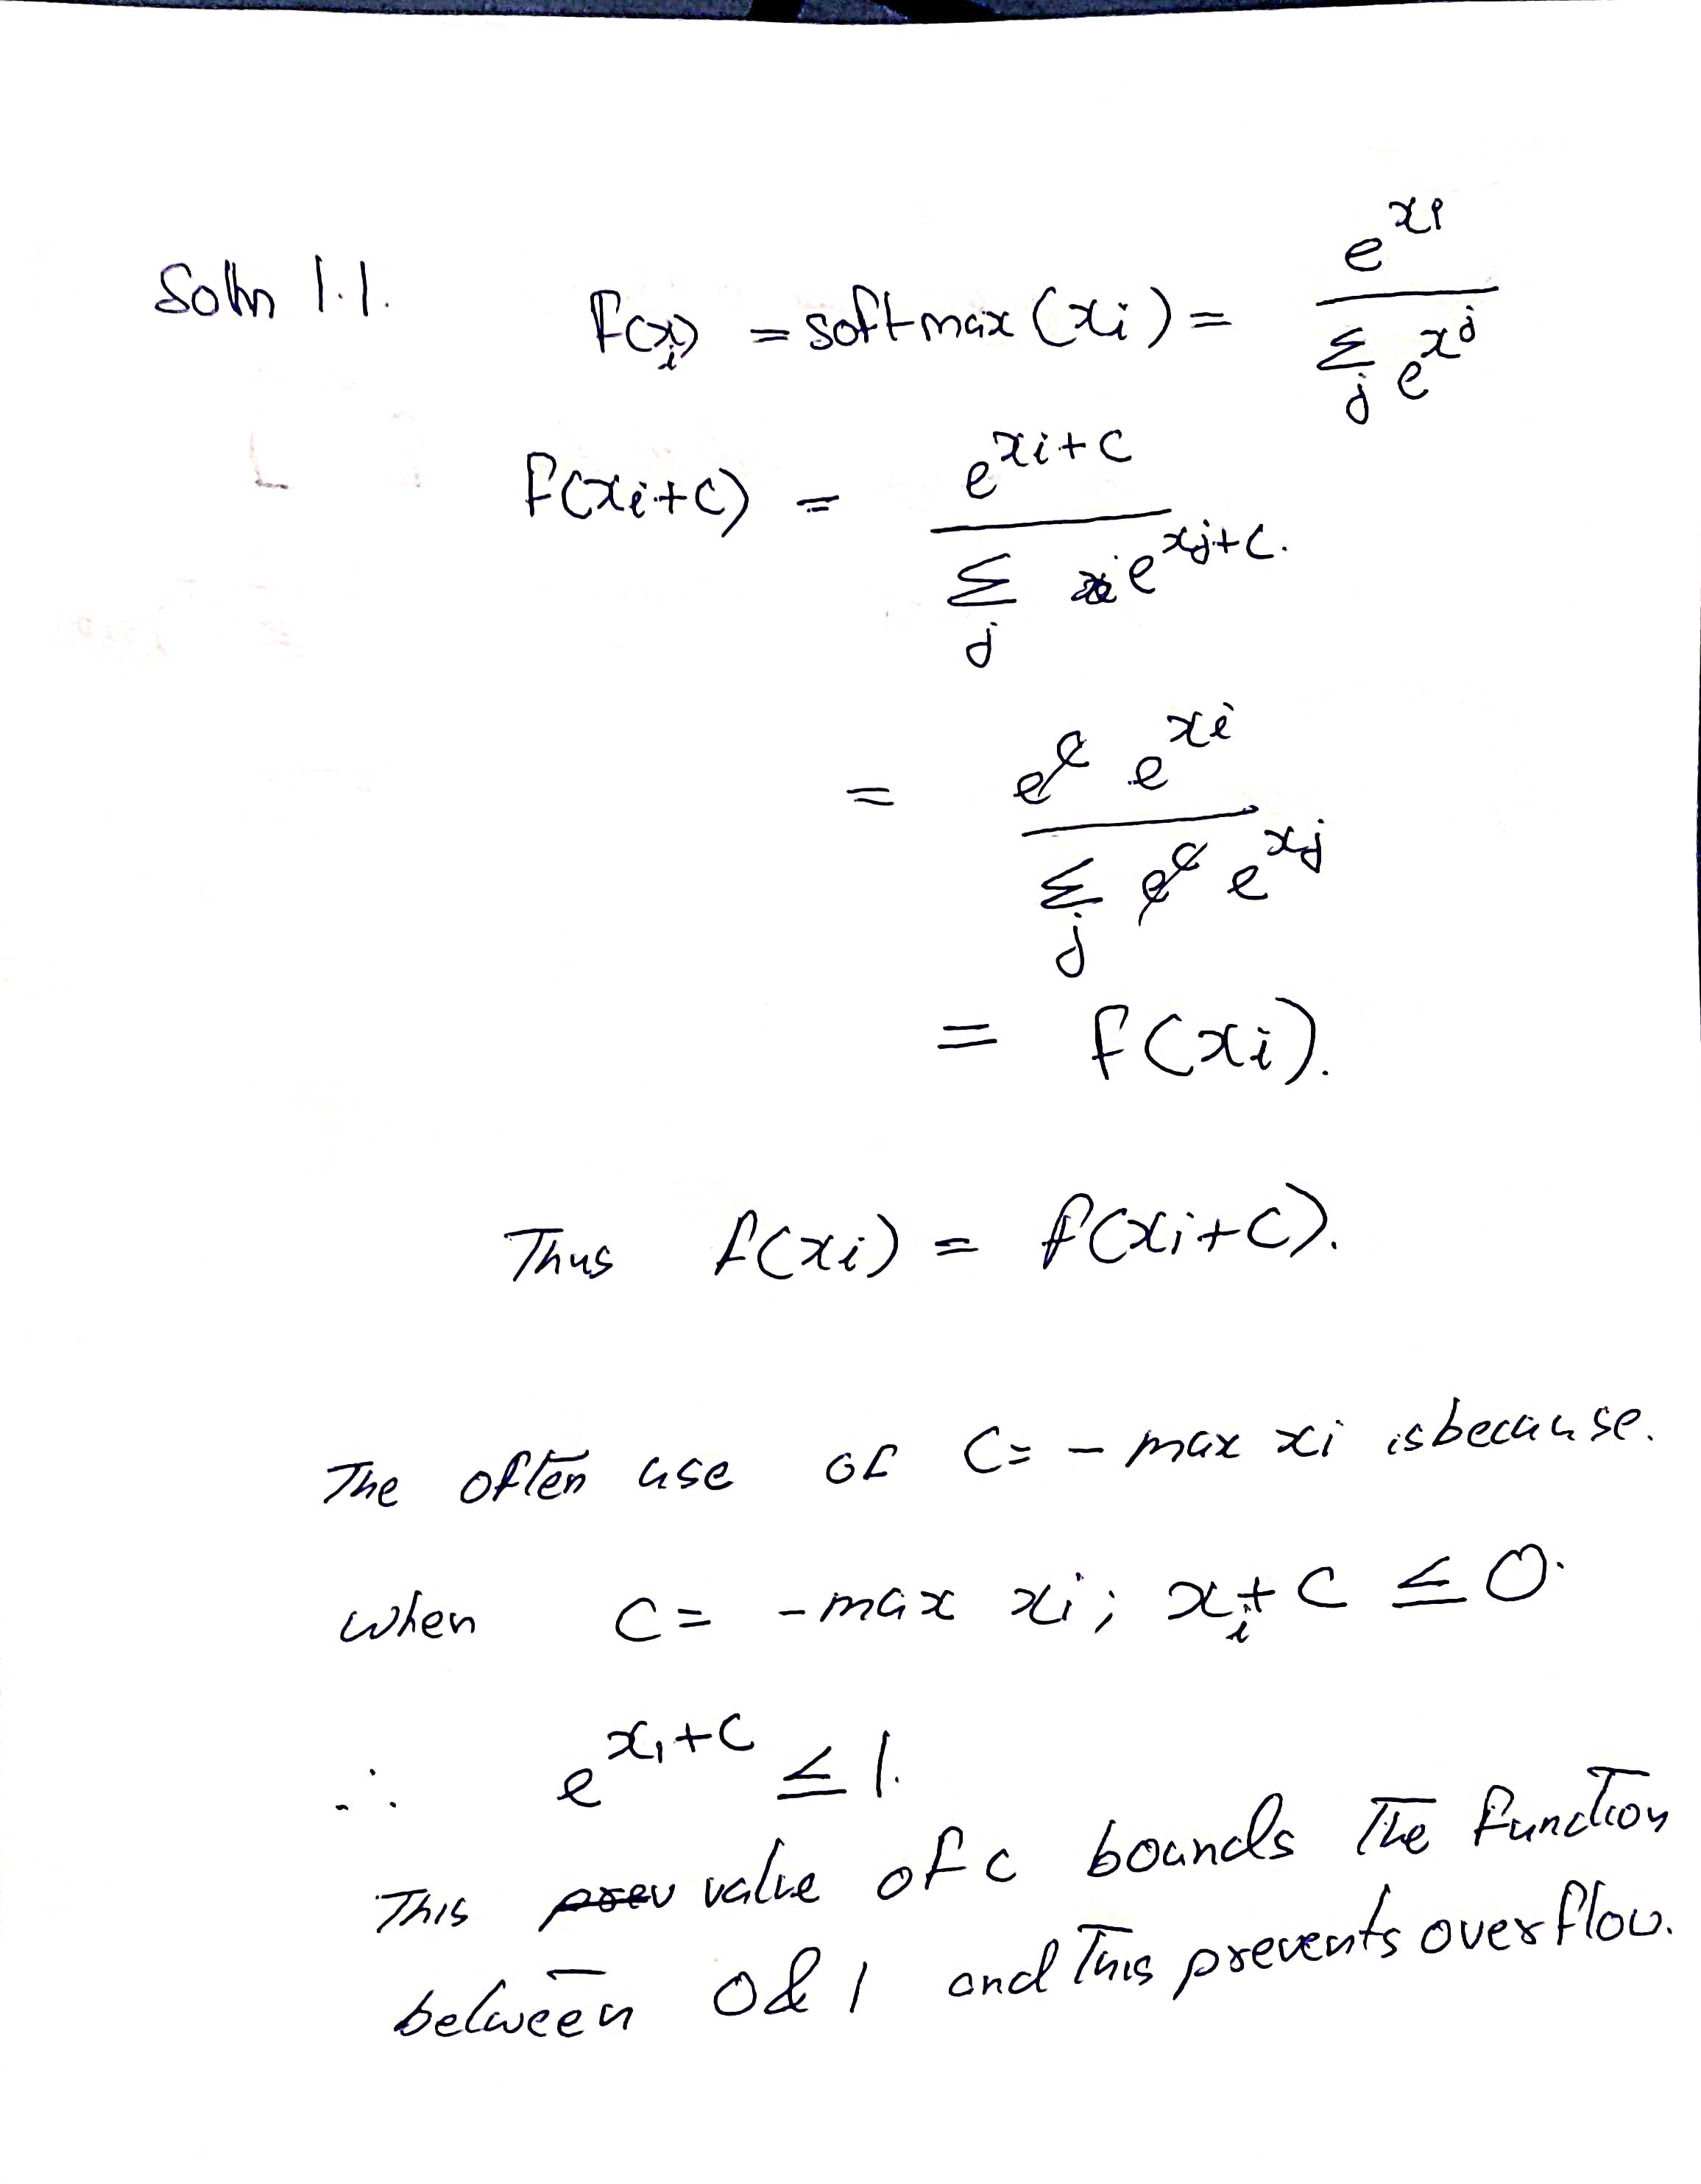

### Q1.2

Softmax can be written as a three step processes, with $s_i = e^{x_i}$ , $S=\sum_i s_i$ and $softmax(x_i)= \frac{1}{S} s_i$.

#### Q1.2.1 (1 point WriteUp)
As $x \in \mathbb{R}^d$, what are the properties of $softmax(x)$, namely what is the range of each element? What is the sum over all elements?

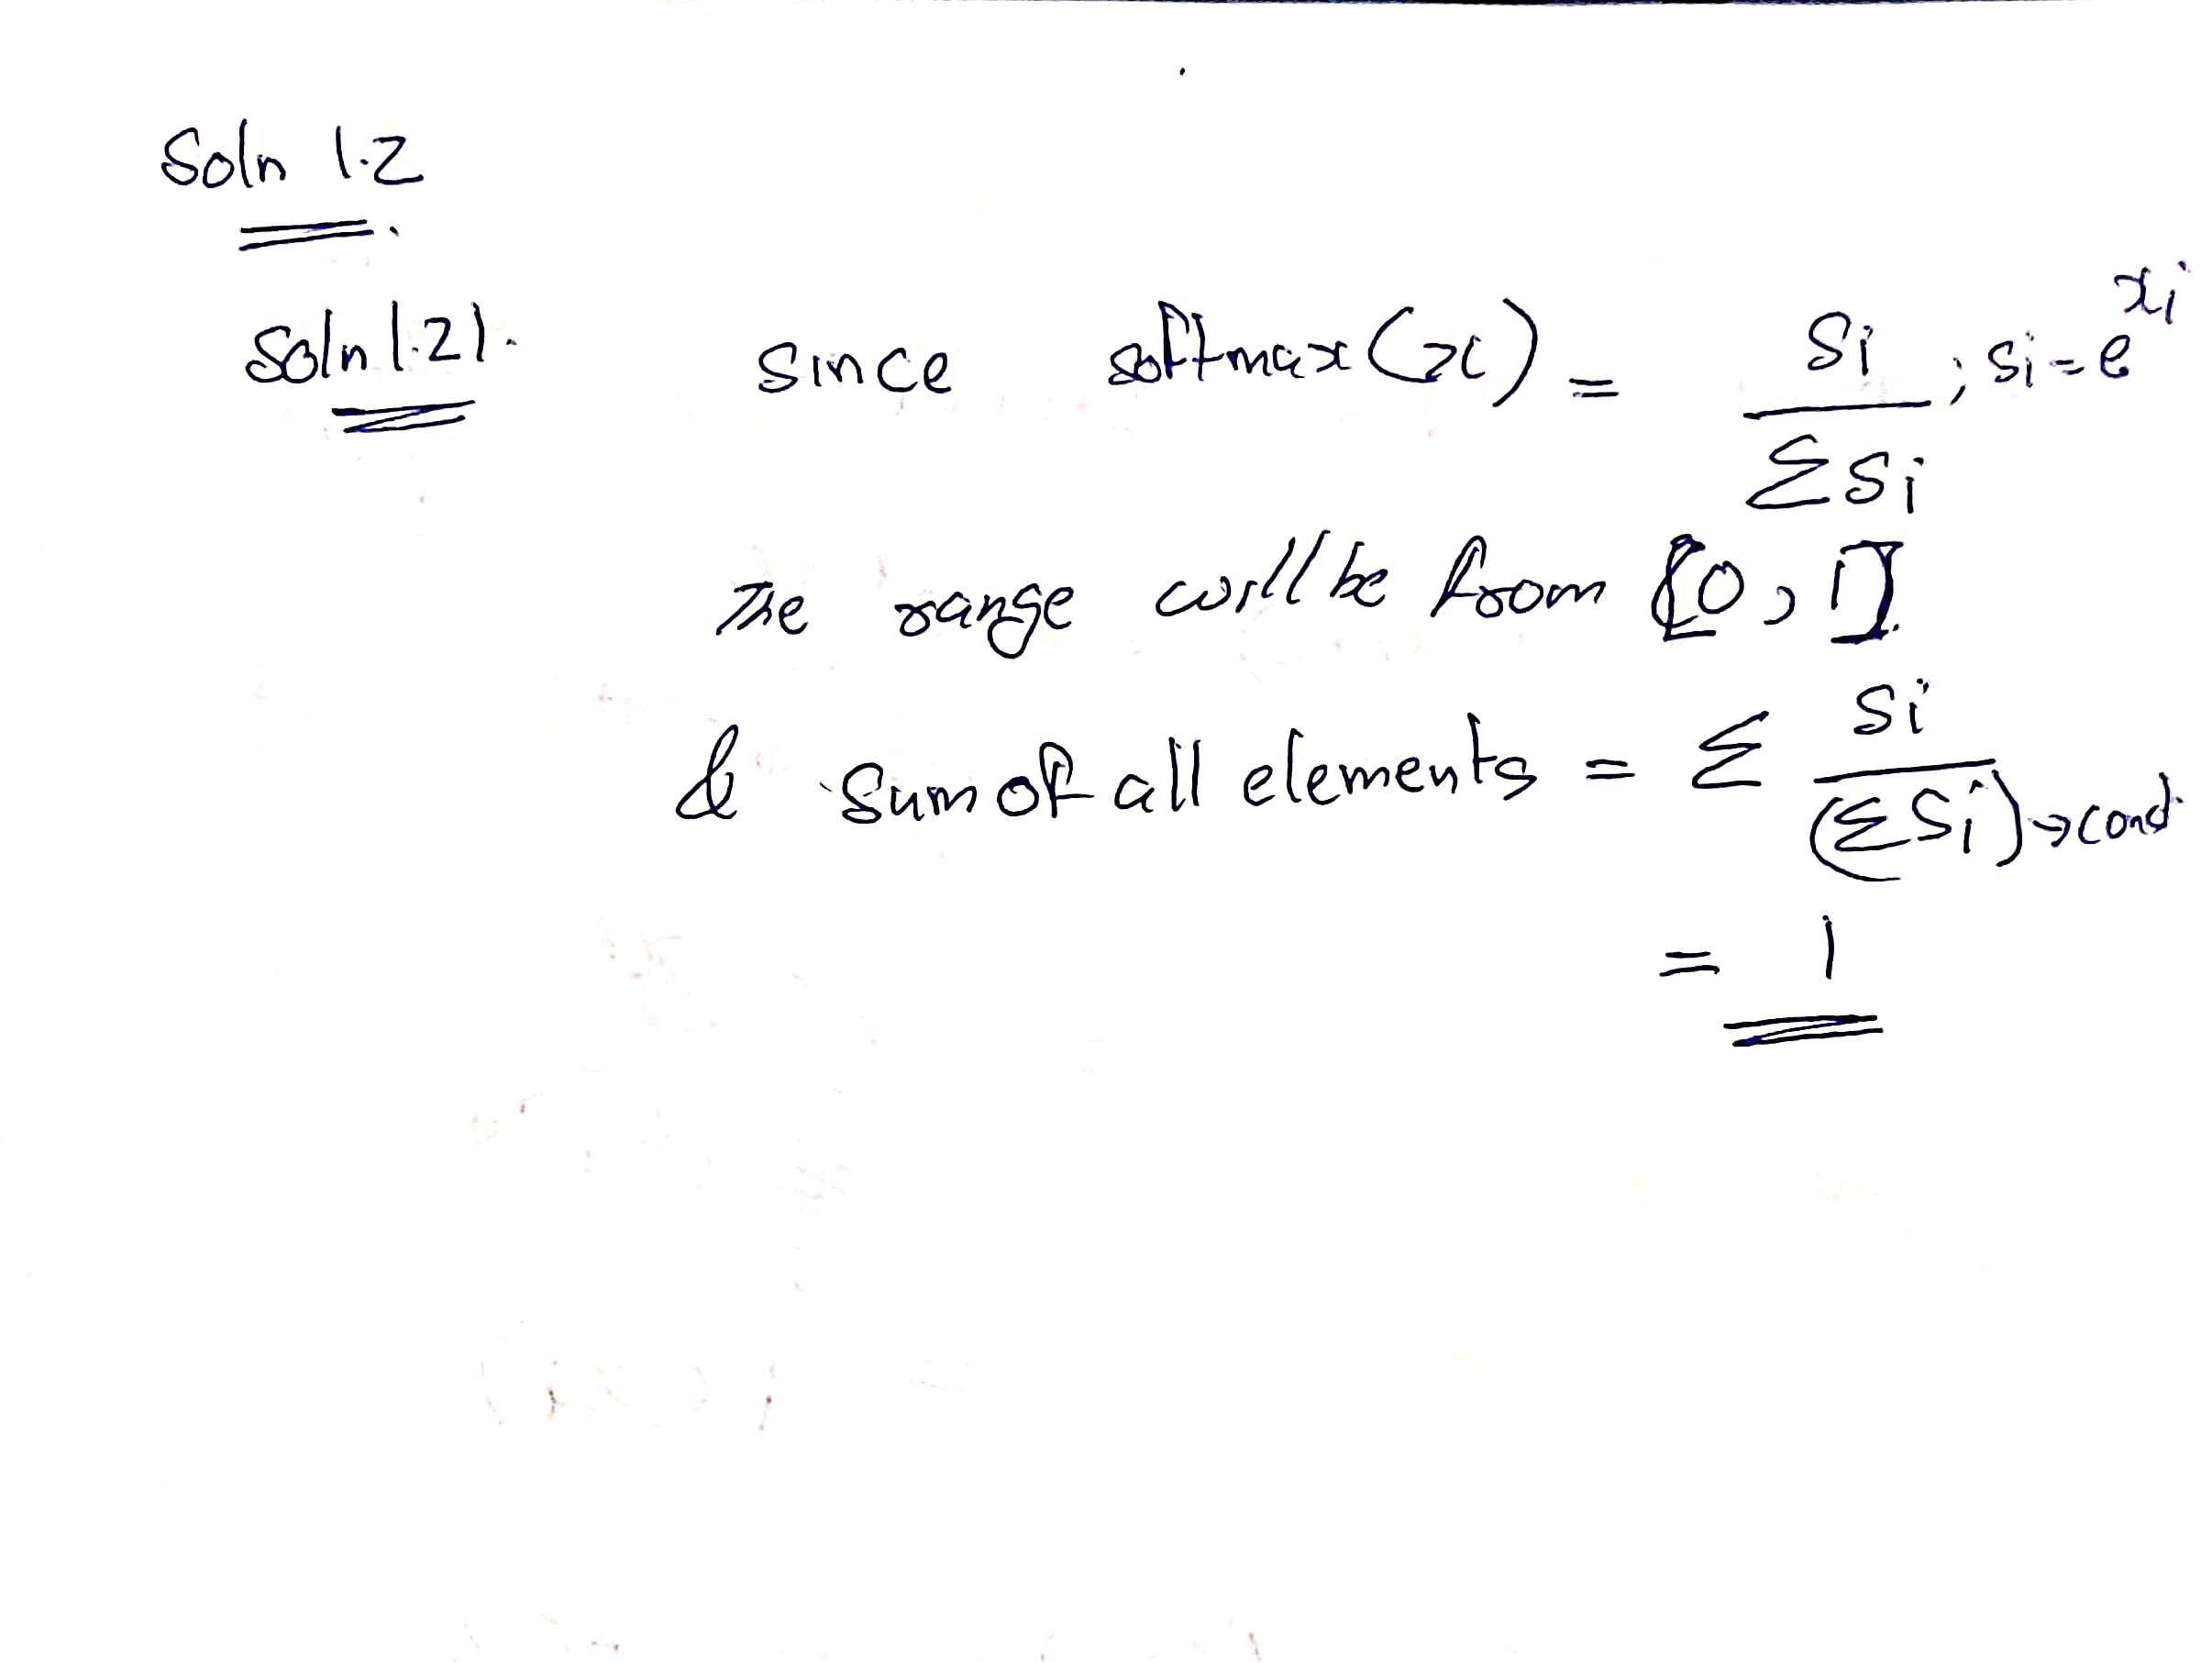

#### Q1.2.2 (1 point WriteUp)
One could say that ”softmax takes an arbitrary real valued vector $x$ and turns it into a ___”. Please think about a short phrase to fill in ___.

Probabilistic distribution

#### Q1.2.3 (1 point WriteUp)
Can you see the role of each step in the multi-step process now? Explain them.

Yes, First step represents scaled version of each element, second step represents scaled version of all the elements and final steps provides relative representation of each element with respect to whole.

### Q1.3 (3 points WriteUp)
Show that multi-layer neural networks without a non-linear activation function are equivalent to linear regression.

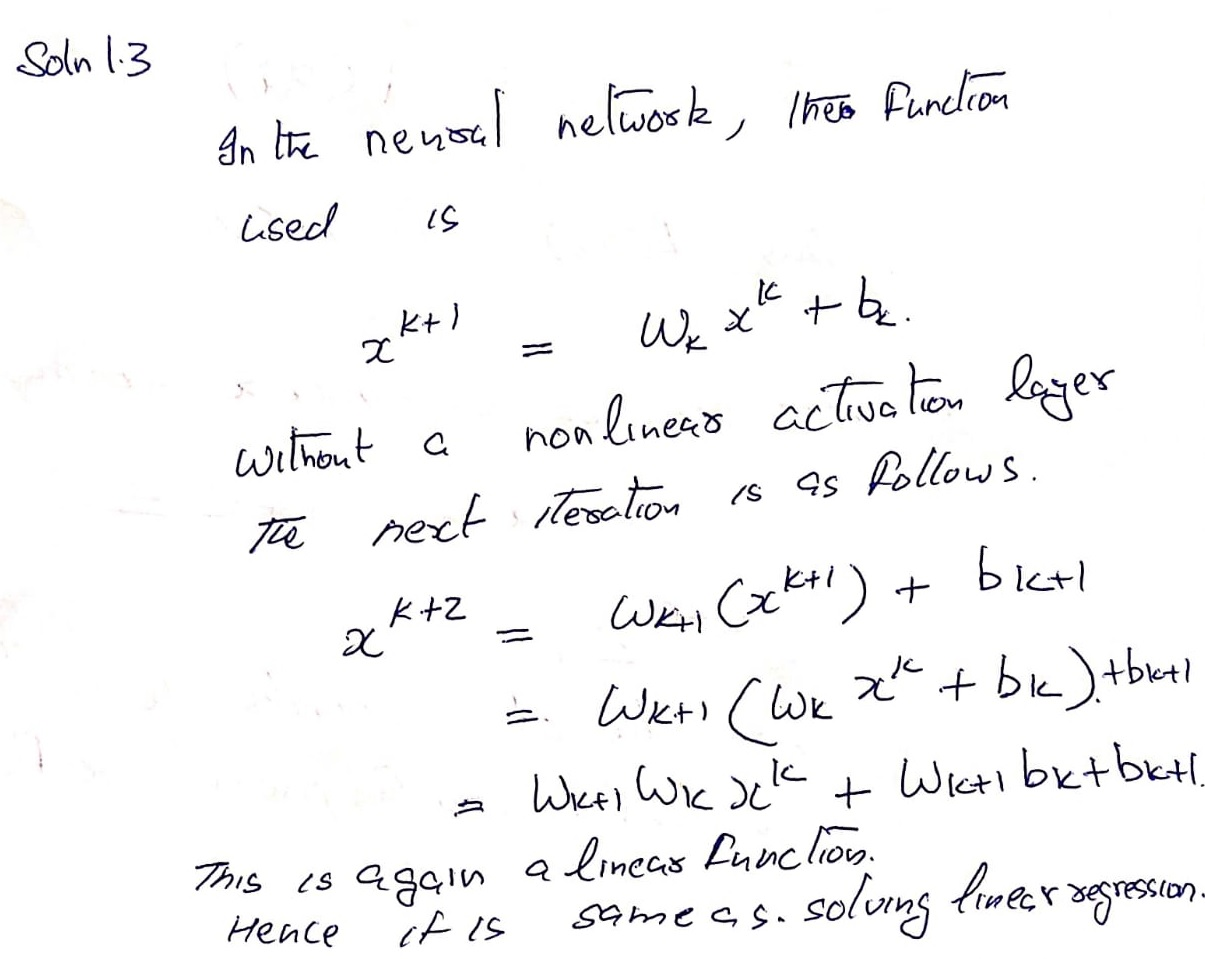

### Q1.4 (4 points WriteUp) 
Given the sigmoid activation function $\sigma(x) = \frac{1}{1+e^{-x}}$ , derive the gradient of the sigmoid function and show that it can be written as a function of $\sigma(x)$ (without having access to $x$ directly)

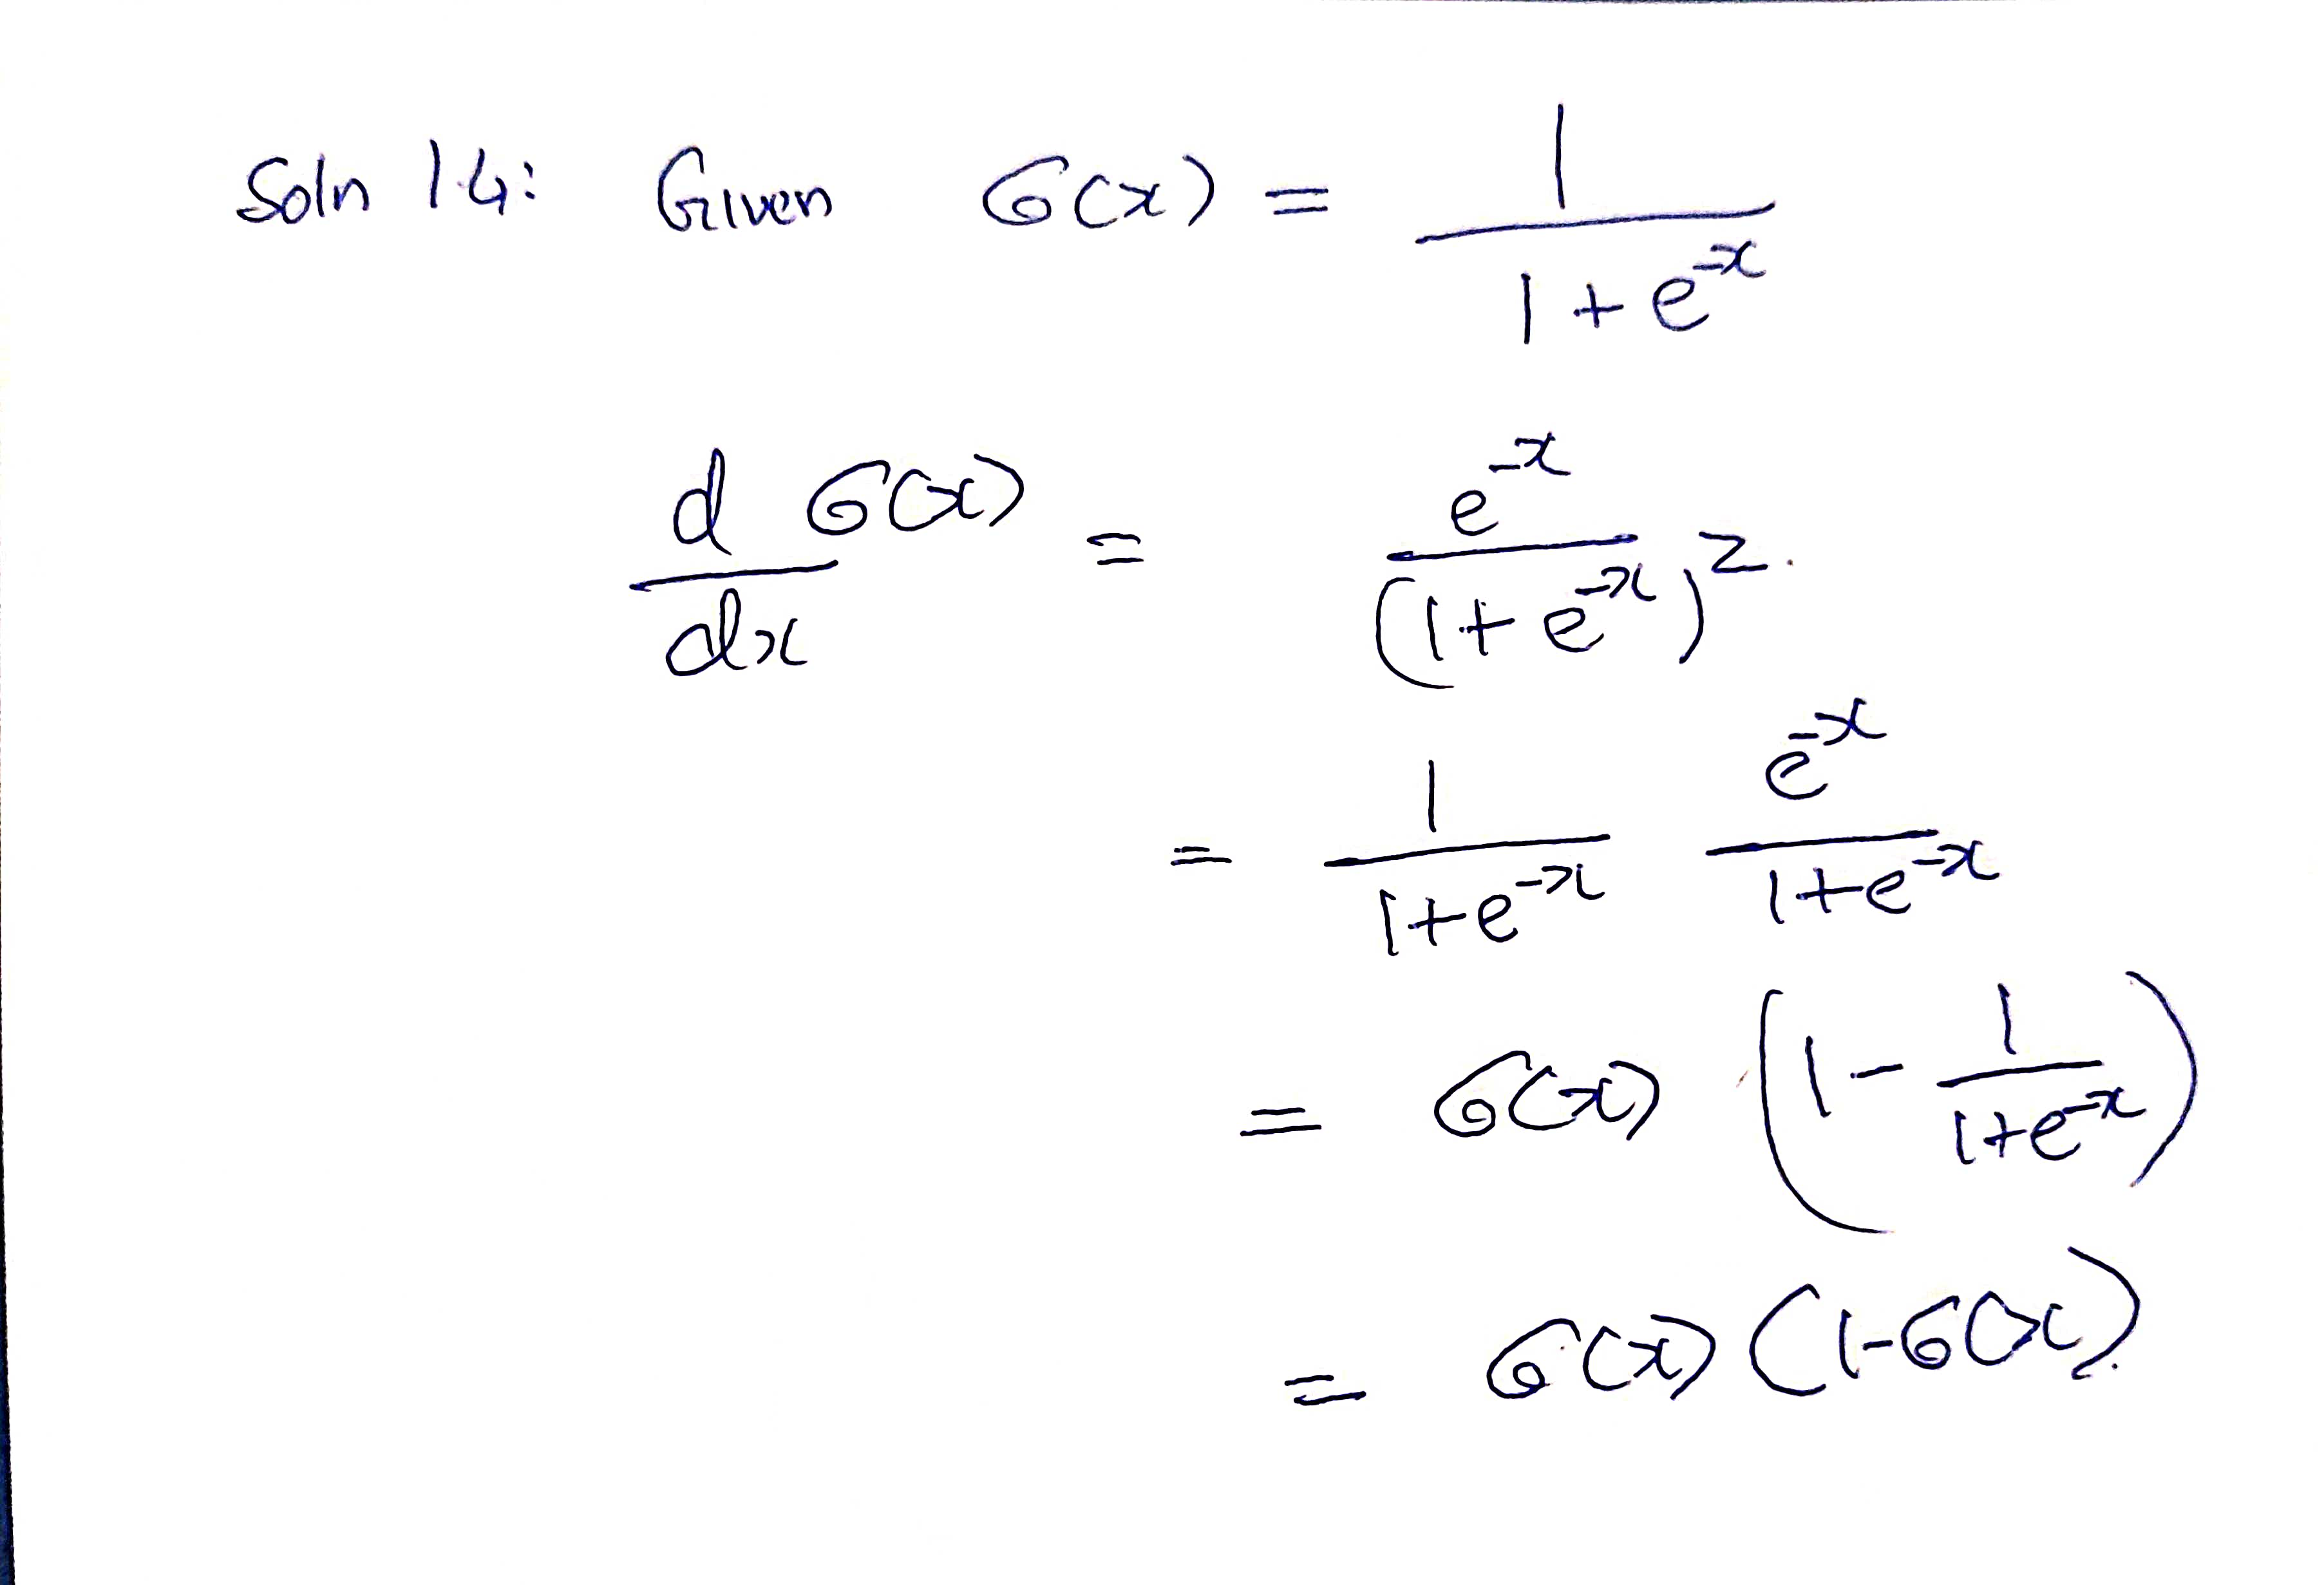

### Q1.5 (12 points WriteUp)

Given $y = W x + b$ (or $y_j = \sum_{i=1}^d  x_{i} W_{ji} + b_j$), and the gradient of some loss $J$ with respect $y$, show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$. Be sure to do the derivatives with scalars and re-form the matrix form afterwards. Here are some notional suggestions.
$$ \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{k \times 1} \quad W \in \mathbb{R}^{k \times d} \quad x \in \mathbb{R}^{d \times 1} \quad b \in \mathbb{R}^{k \times 1}$$
    

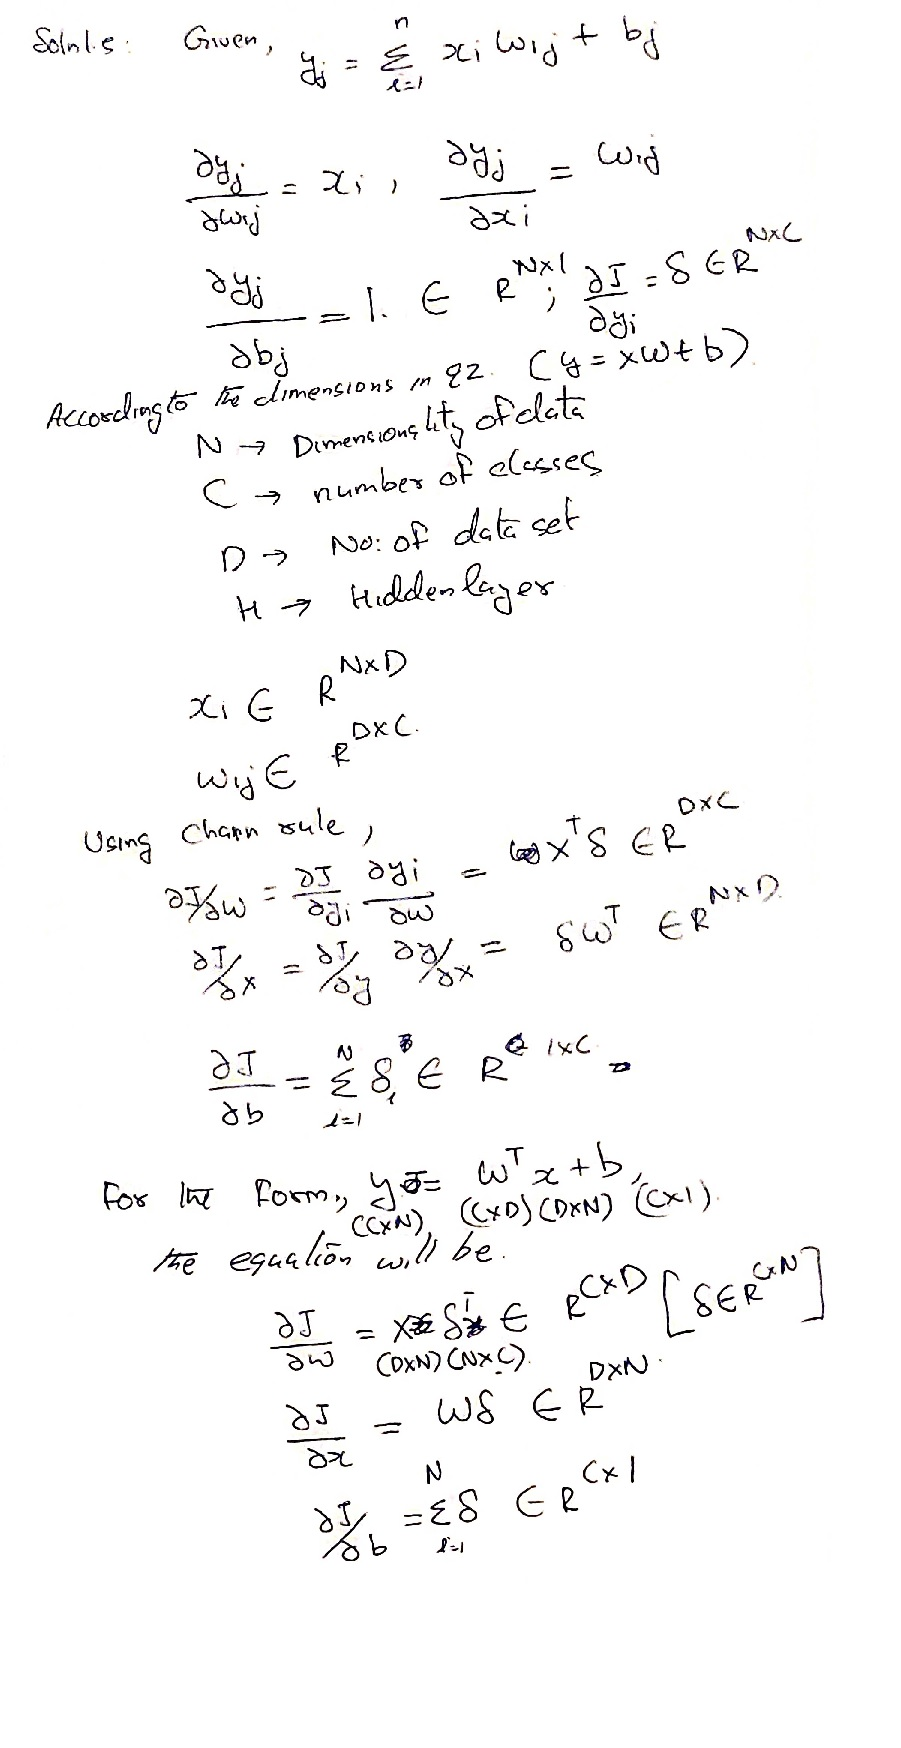

### Q1.6 (15 points WriteUp)

We will find the derivatives for Conv layers now. Since most Deep Learning frameworks such as Pytorch, Tensorflow use cross-correlation in their respective "convolution" functions ([Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/convolution)), we will continue this abuse of notation. So the operation performed with the Conv Layer weights will be cross-correlation.
    
The input, $x$ is of shape $M\times N$ with C channels. This will be *convolved* (actually cross-correlation) with $D$ number of $K\times K$ filters, each with a bias term. The stride is 1 and there will be no padding. We know the gradient of some loss $J$ with respect to the output $y$, which will have $D$ channels. Show how to get $\frac{\partial J}{\partial W}$, $\frac{\partial J}{\partial x}$ and $\frac{\partial J}{\partial b}$.

The dimensions and notation are as follows:
$$
    \frac{\partial J}{\partial y} = \delta \in \mathbb{R}^{D\times M_o \times N_o}
    \quad
    M_o = M-K+1
    \quad
    N_o = N-K+1
$$
$$
    x \in \mathbb{R}^{C\times M \times N}
    \quad
    W \in \mathbb{R}^{D\times C \times K \times K}
    \quad
    b \in \mathbb{R}^{D}
$$

$x_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the input

$y_{c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column and the $c^{th}$ channel of the output

$W_{d, c, i, j}:$ The element at the $i^{th}$ row, the $j^{th}$ column, the $c^{th}$ channel of the kernel of the $d^{th}$ filter

*For this question, you may compute the derivatives with scalars only. You don't need to re-form the matrix*
    

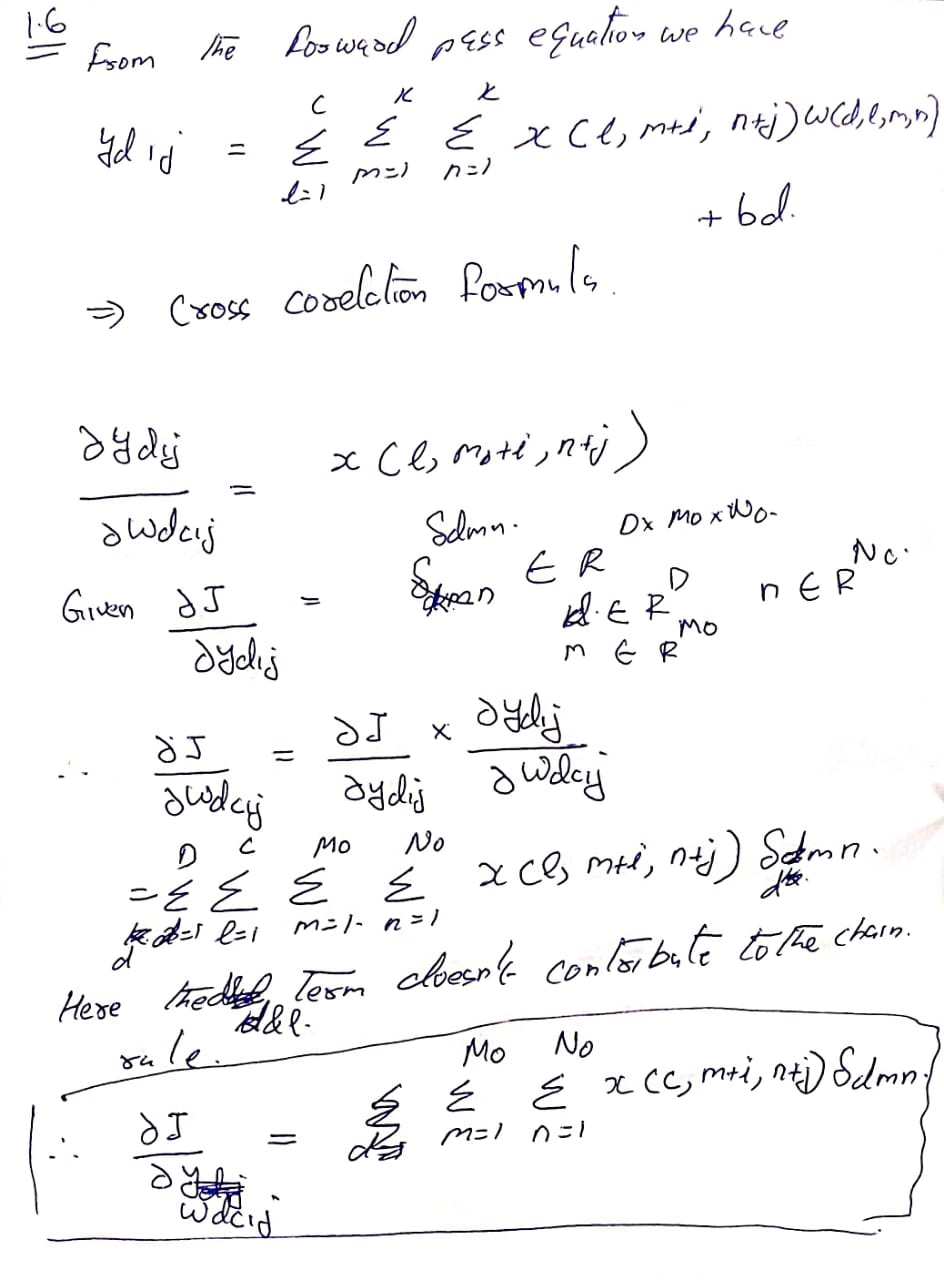

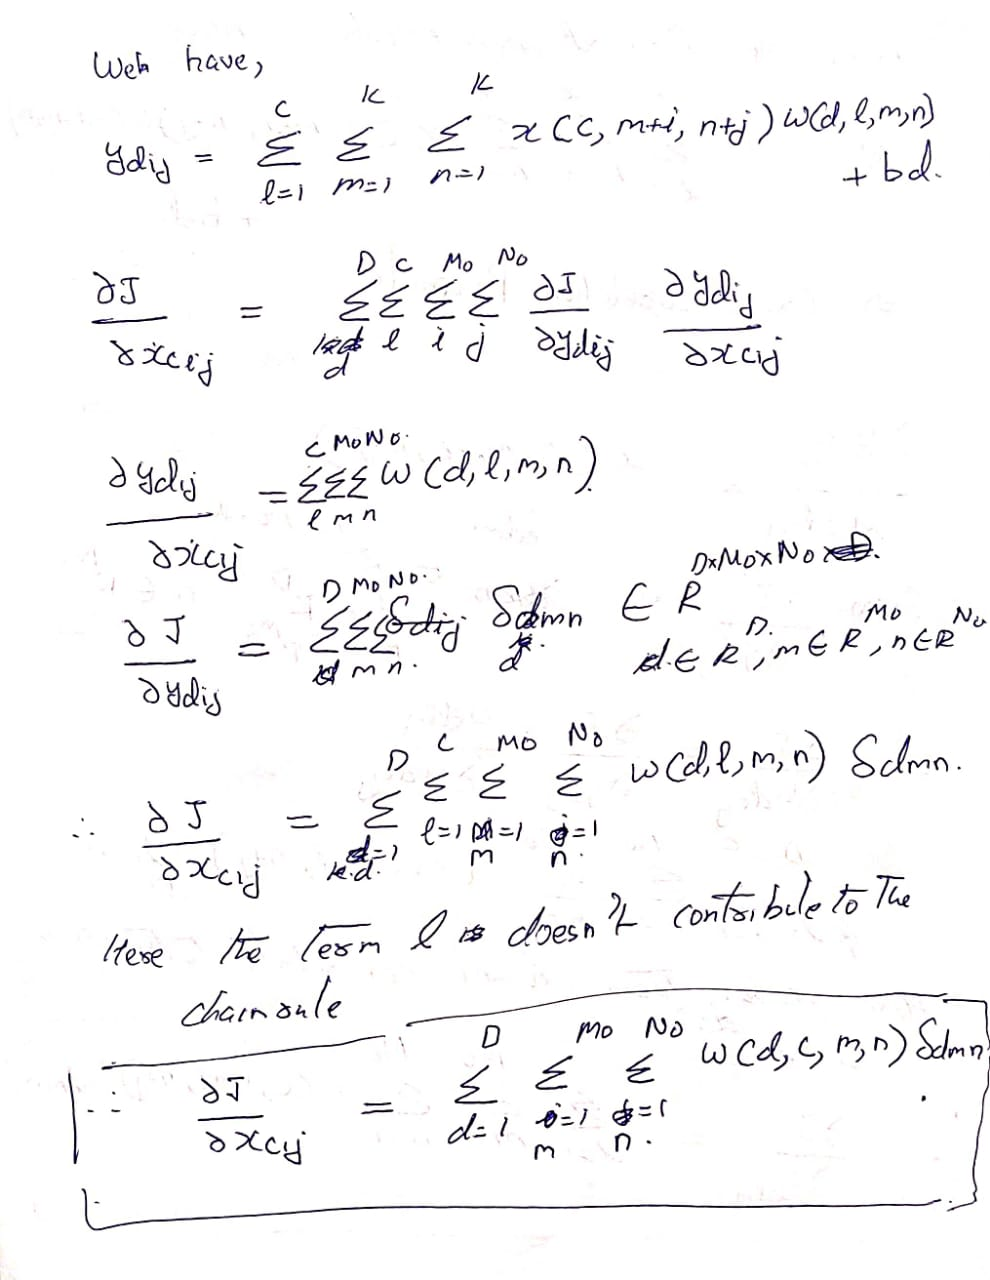

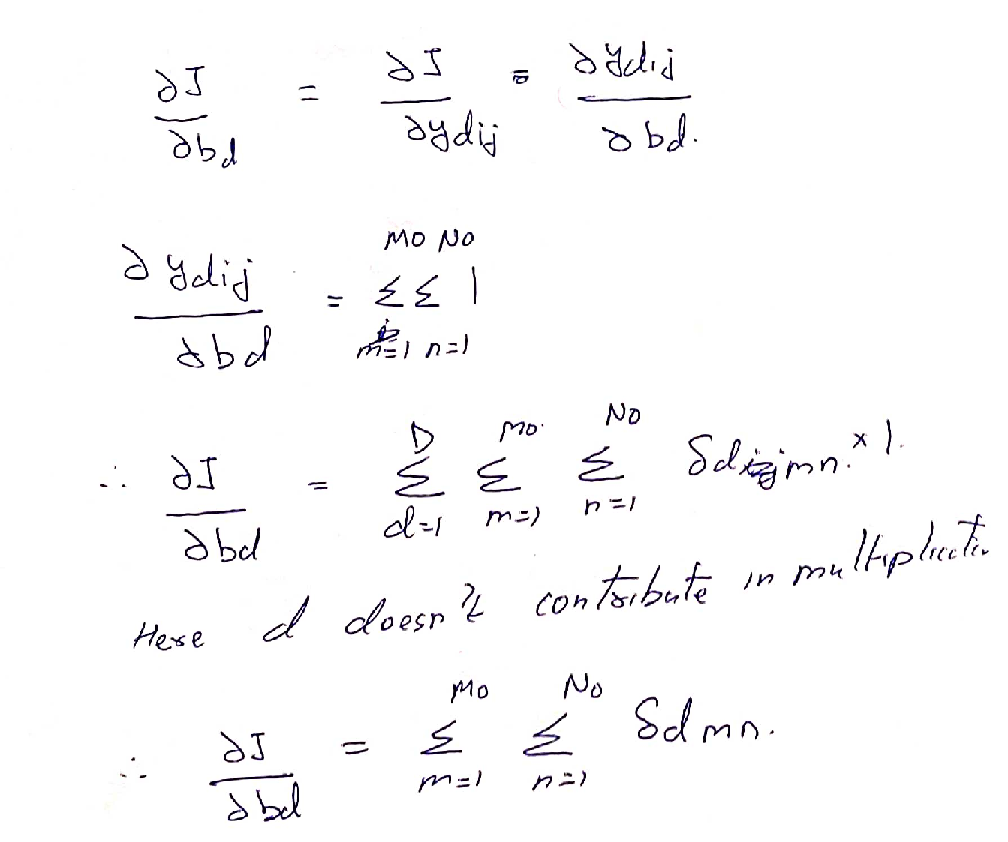

### Q1.7

When the neural network applies the elementwise activation function (such as sigmoid), the gradient of the activation function scales the back-propagation update. This is directly from the chain rule, $\frac{d}{d x} f(g(x)) = f'(g(x)) g'(x)$.

#### Q1.7.1 (1 point WriteUp)
Consider the sigmoid activation function for deep neural networks. Why might it lead to a "vanishing gradient" problem if it is used for many layers (consider plotting the $\sigma'(x)$ in Q1.4)?

The derivative of sigmoid is as shown below: When we apply this function during backprop, as its value ranges from(0,0.25), each time when this fucnction is used, it will scale down the gradients. So, when this is used multiple times it will diminish the gradient value nearly to zero, hence causing vanishing gradient issue. 



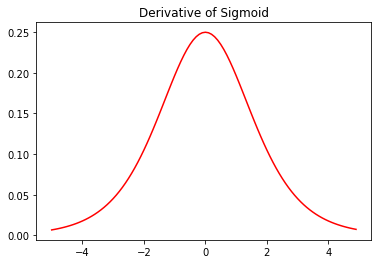

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y =np.exp(-x) /(1+np.exp(-x))**2
plt.plot(x,y, color ='r', label ='tanh')
plt.title('Derivative of Sigmoid')
plt.show()

#### Q1.7.2 (1 point WriteUp)
Often it is replaced with $\tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}$. What are the output ranges of both $\tanh$ and sigmoid? Why might we prefer $\tanh$ ? 

The output range of derivative of tanh and sigmoid output ranges is from (0,1). We prefer tanh because the derivative of tanh is from (0, 1) unlike sigmoid. Thus it doesnt diminish the gradient as fast as sigmoid. Also, tanhx mean is centered at zero, so it converges faster, which makes it easier to train the model 



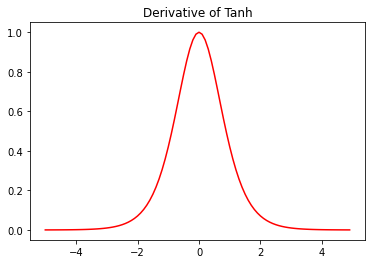

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y =1- np.tanh(x)**2
plt.plot(x,y, color ='r', label ='tanh')
plt.title('Derivative of Tanh')
plt.show()

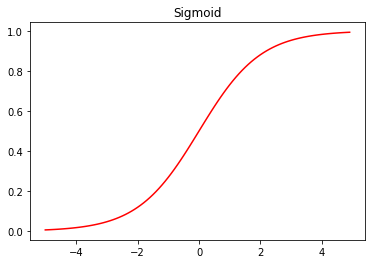

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y =1 /(1+np.exp(-x))
plt.plot(x,y, color ='r', label ='tanh')
plt.title('Sigmoid')
plt.show()

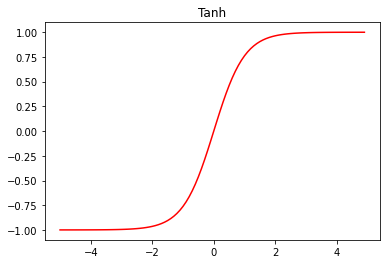

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y =(1 - np.exp(-2*x))/(1+np.exp(-2*x))
plt.plot(x,y, color ='r', label ='tanh')
plt.title('Tanh')
plt.show()

#### Q1.7.3 (1 point WriteUp)
Why does $\tanh(x)$ have less of a vanishing gradient problem? (plotting the derivatives helps! for reference: $\tanh'(x) = 1 - \tanh(x)^2$)

As shown in the above graph, the range of derivative of tanh is from (0,1) and of sigmoid is from (0, 0.25). So, derivative of tanh has lesser gradient vanishing probelm when compared to derivative of sigmoid.

#### Q1.7.4 (1 point WriteUp)
$\tanh$ is a scaled and shifted version of the sigmoid. Show how $\tanh(x)$ can be written in terms of $\sigma(x)$. (*Hint: consider how to make it have the same range*)

σ(2x) = 1/(1 + exp(-2x))


2σ(2x) -1 = 2/(1 + exp(-2x)) -1 = (1 - exp(-2x))/(1 + exp(-2x)) = tanhx


tanhx=2σ(2x)−1 


***
## For the following questions, please find the instructions in the corresponding jupyter notebooks.

## Q2 Implement a Fully Connected Network (65 points + 10 Extra Credit)

#### Q2.1.1 (3 points WriteUp)

If the weights and bias is set zero during the initialization, during the forward propagation, each hidden node wouldnt get an input (zero input) from input layer. During the back propagation, the due tho zero weights, it will give same gradients and thus do the saame computation. This is not good for optimal training.

#### Q2.1.3 (2 points WriteUp)

Random initialization provides uniform data distribution in the matrix and prevent same computation in the network. Thus, it increases the chance of reaching optimal parameters faster which can lead to low loss.

Scaling initalization based on layer size will keep the variance of the gradients of parameters same (same order) for all the layers. Thus, during forward propagation and back propagation, it will prevent gradient explosion and vanishing gradient problem.

## Q3 Training Models (20 Points)

### Q3.2 (3 points Code+WriteUp)

The figure below shows the train and test acuracy and loss for 3 learning rate. The optimal learning rate is 2.55e-3 and the optimal accuracy in test set is 75.11%.

Comment on learning rate:

With optimal learning rate we obtain the max accuracy. On decreasing the learning rate, the curve will be smooth but it leanrs slowly and thus it never reaches the optimal accuracy. When we increase the learning rate, the variation of the curve (alot of spikes) will increase and thus it has more purturbation and wont converge properly 

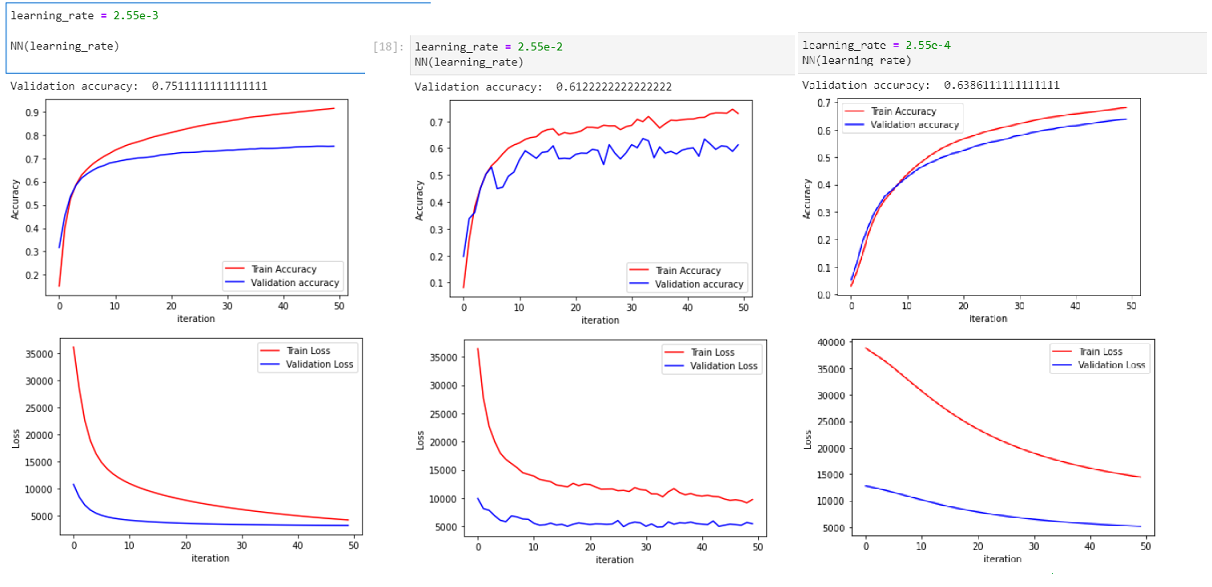

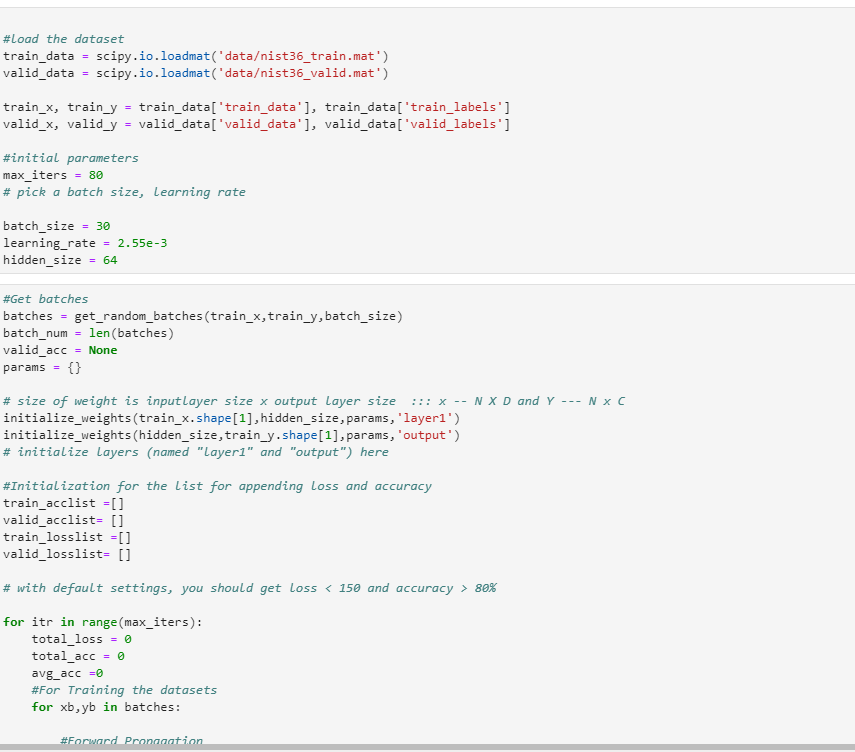

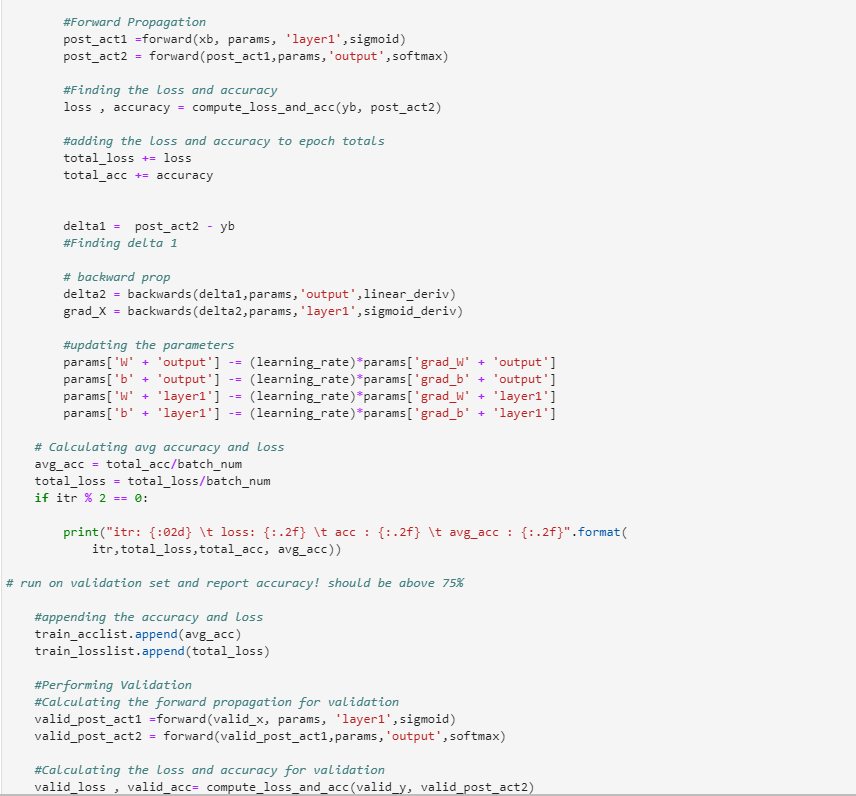

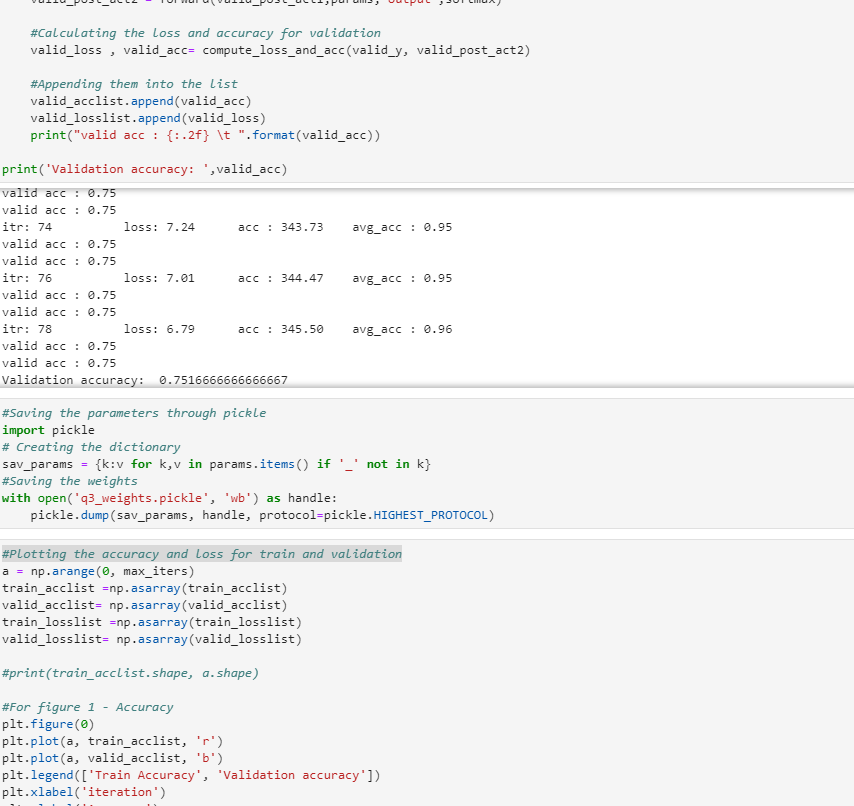

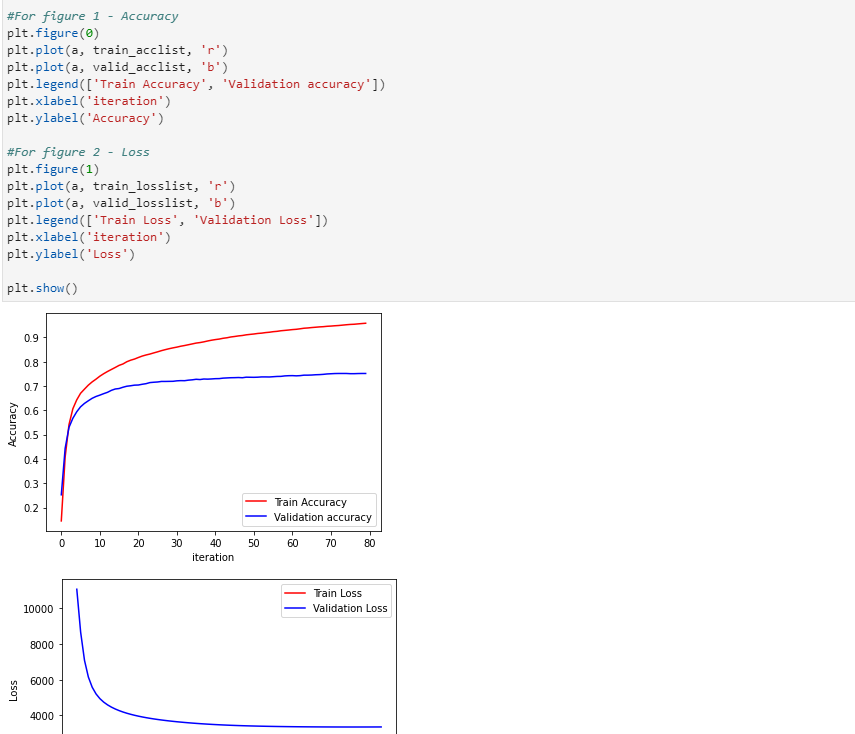

### Q3.3 (2 points Code+WriteUp)

Visualization of the weights for the first layer just after initialization is as follows


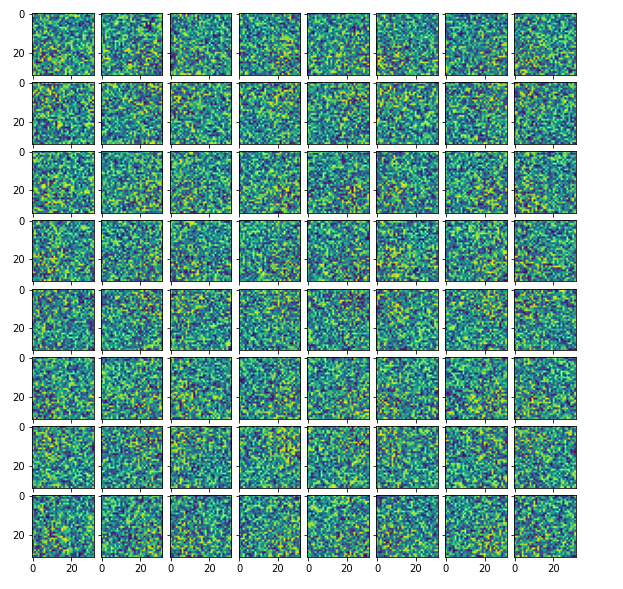

Visualization of the weights for the first layer after learning is as follows:

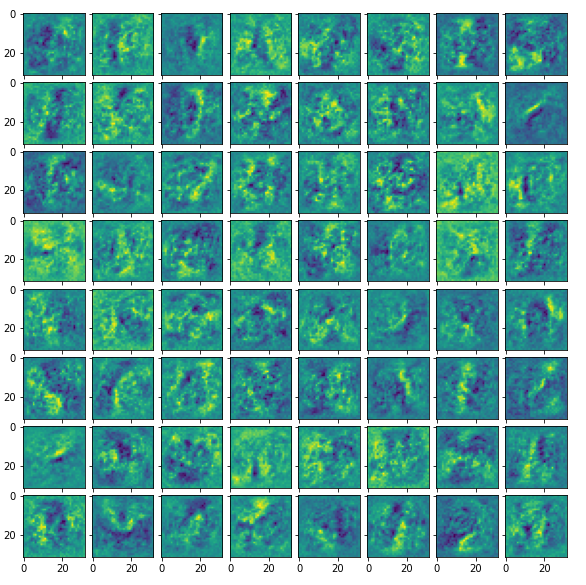

Comparing these two figures, we can see the weights just after initialization shows random pattern, meanwhile the one which is learned shows clearer pattern.

Code for learned weights

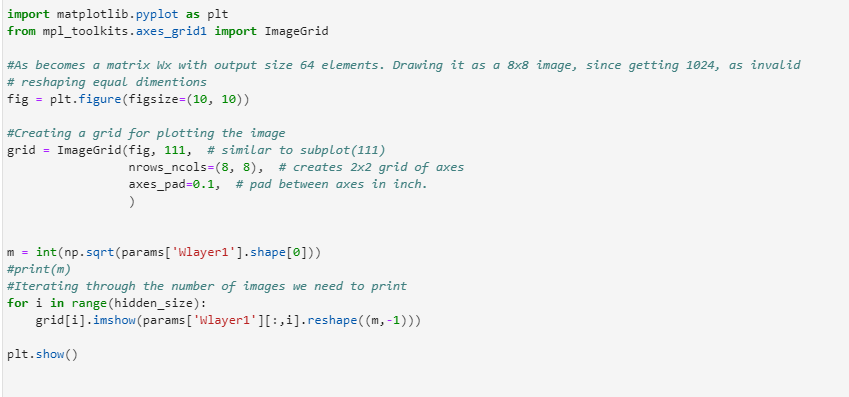

Code for initialized weights

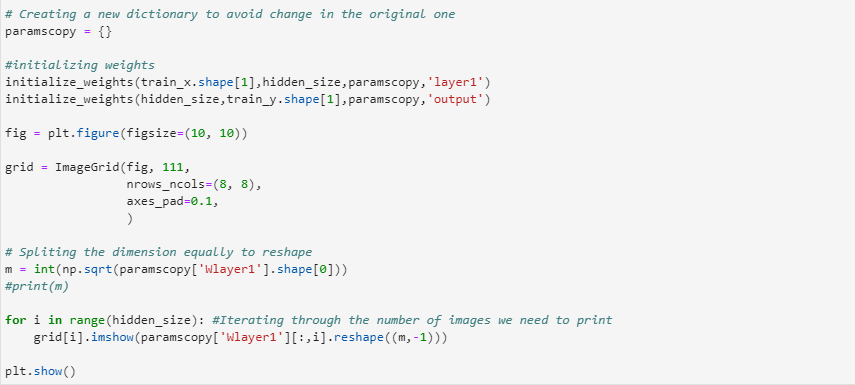

### Q3.4 (3 points Code+WriteUp)

Images in the validation set for which the y2 values is maximum

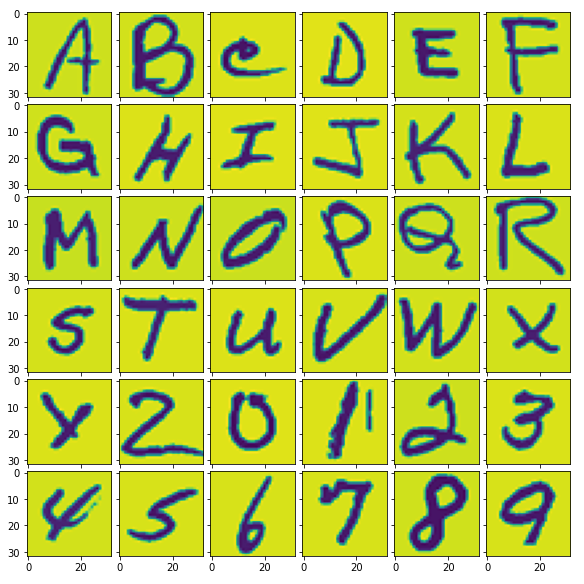

Visualization of final layer weights

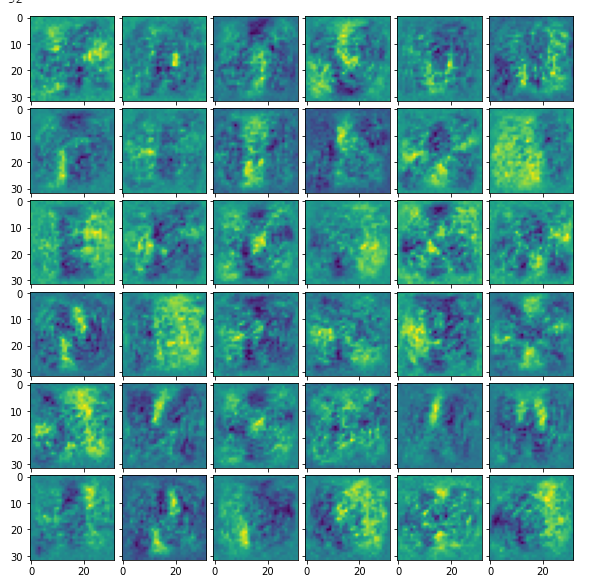

Code for the printing the maximum y2 value

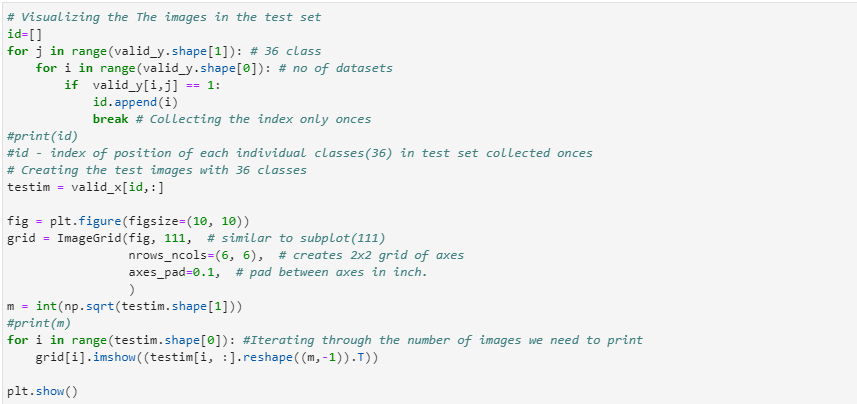

Code for visualization of final layer weights

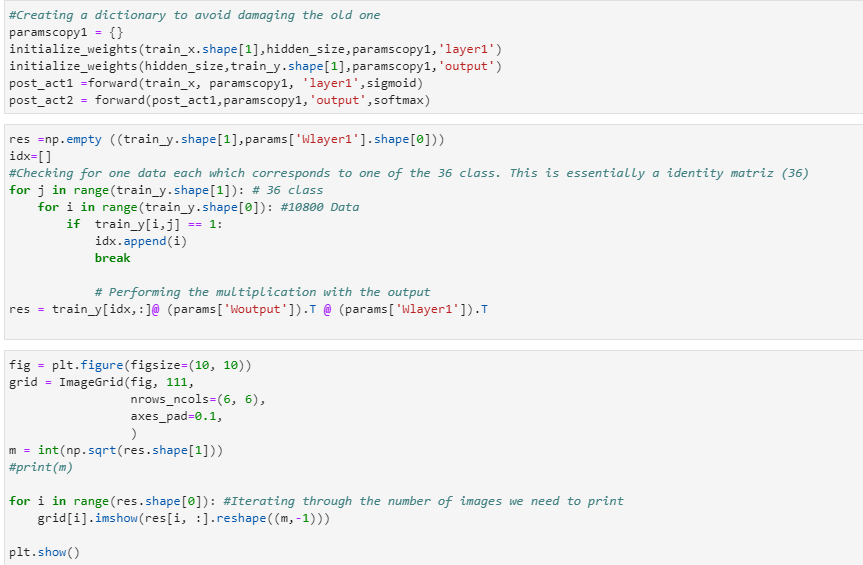

### Q3.5 (4 points Code+WriteUp)

From the confusion matrix of the testset and trainset.The brighter the cell is =, the larger the number it was in that cell. Since, the diagonal is heavly  brightened, we can conclude that the accuracy is good. Nevertheless, there are some mispairs  like 0 and O , S and 5 , Z and 2,  6 and G. But these mispairs are more common features, which may be the reason for mismatch and they are often mismatched by human eye as well.  

Confusion Matrix for Trainset

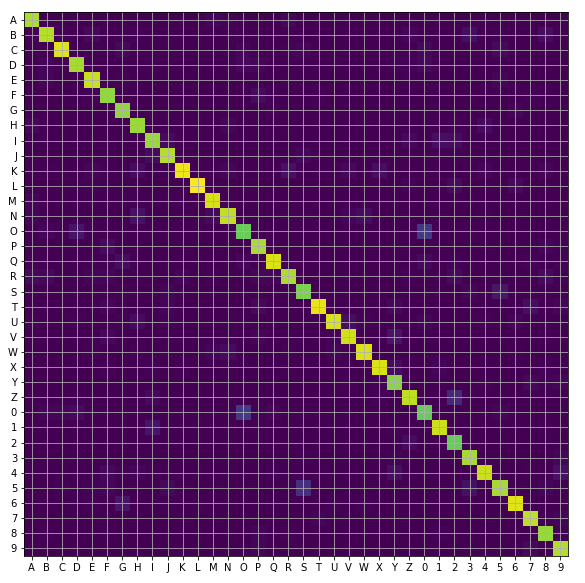

Confusion Matrix for Testset

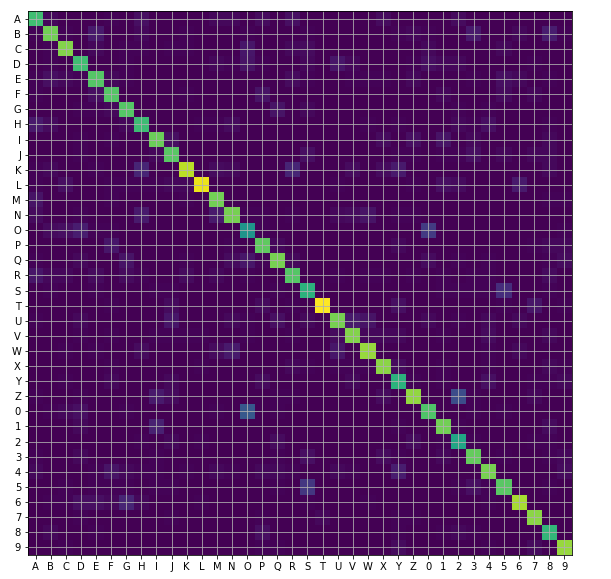


Code for Confusion matrix:

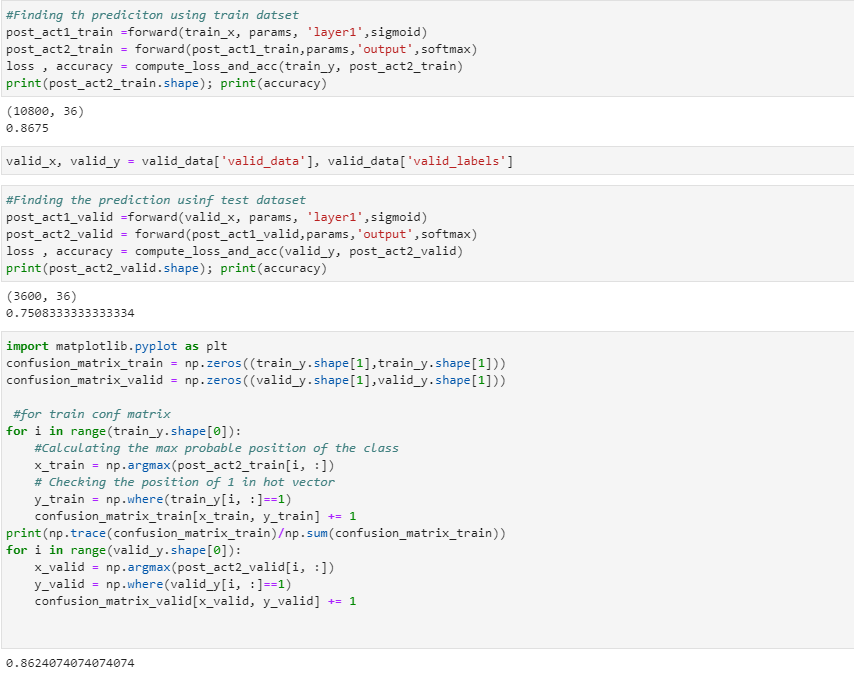

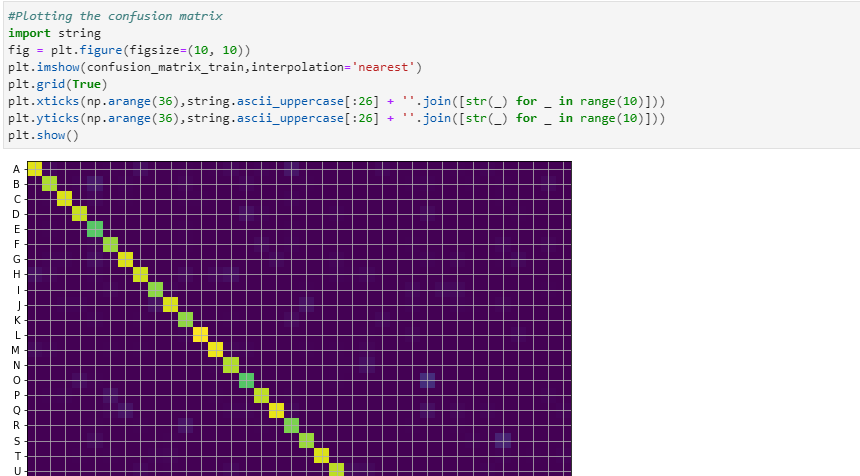

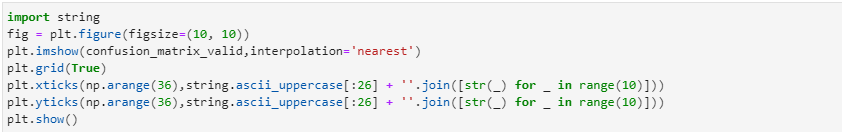

## Q4 Extract Text from Images (35 points)

### Q4.1 (3 points WriteUp)

The two big assumption we make are :

1. Each character is continous and fully connected. Every character is isolated from another character. This method works on the connections of the character. So for words like shown below or the one with cursive writing wont be detected properly.

2. The characters are of similar size. If few of the character are smaller, then it might get filtered out and wont be detected properly. One example is show below.

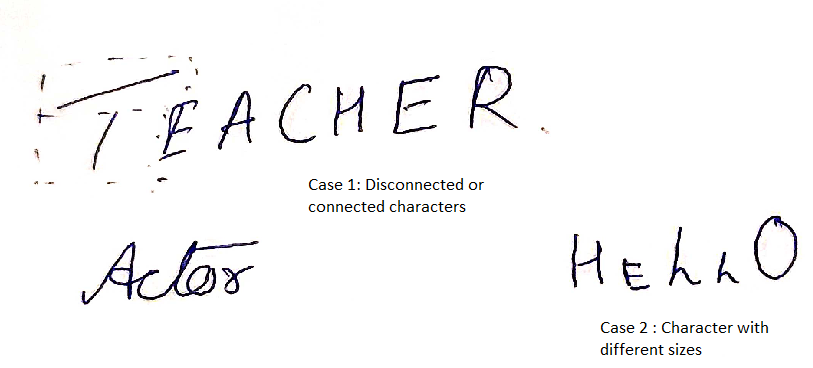

### Q4.2 (13 points Code+WriteUp)

Code:

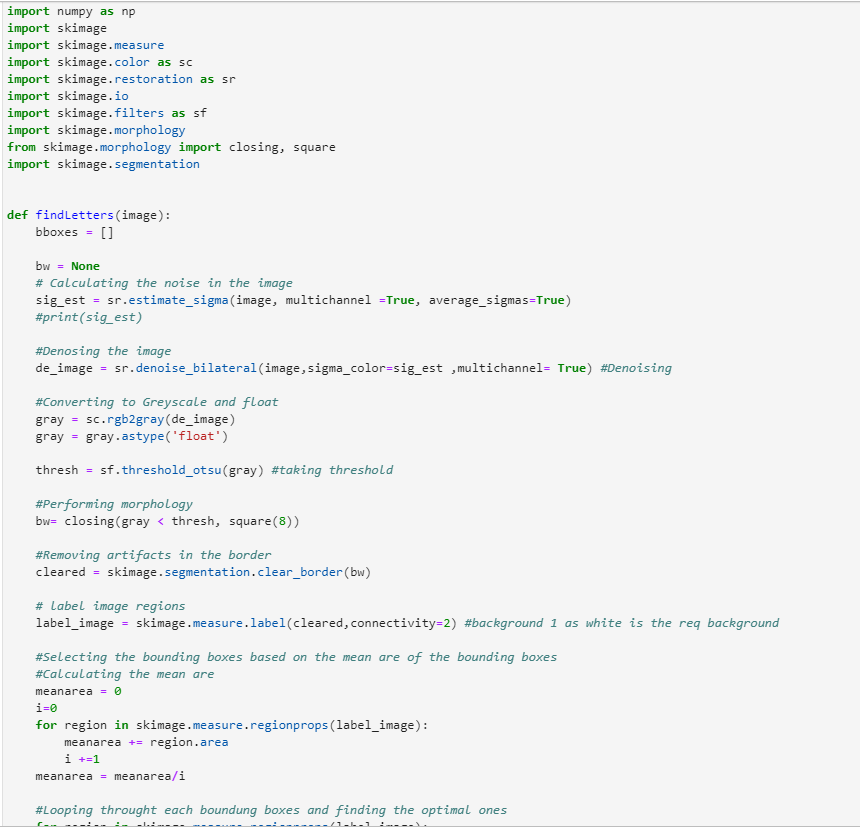

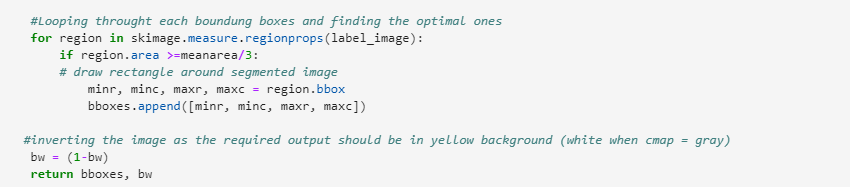

### Q4.3 (6 points WriteUp)

Images with bounding boxes

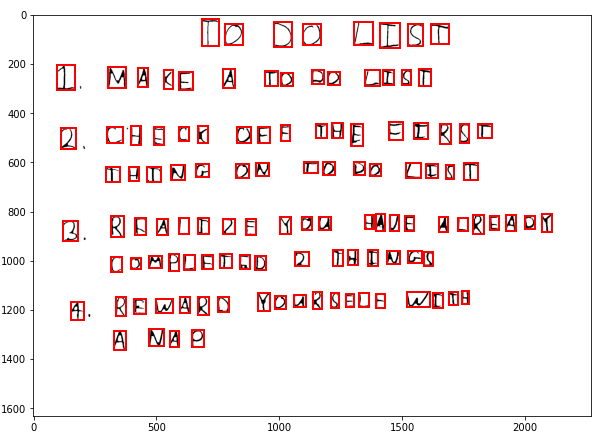

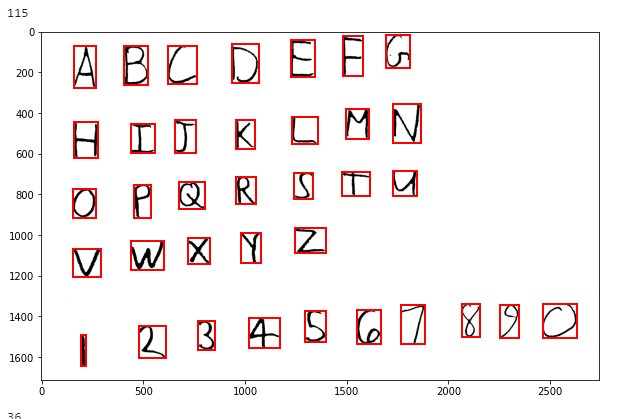

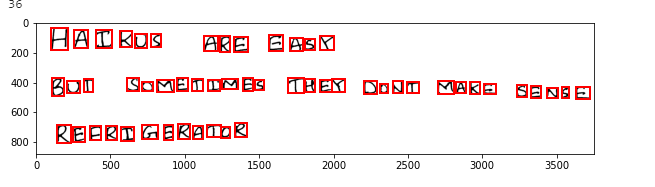

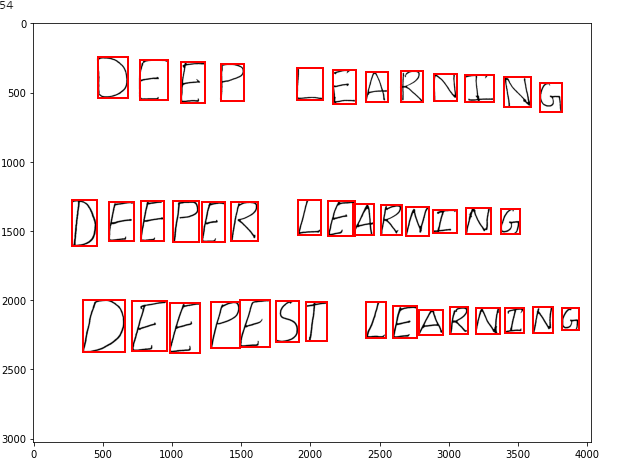

Code:

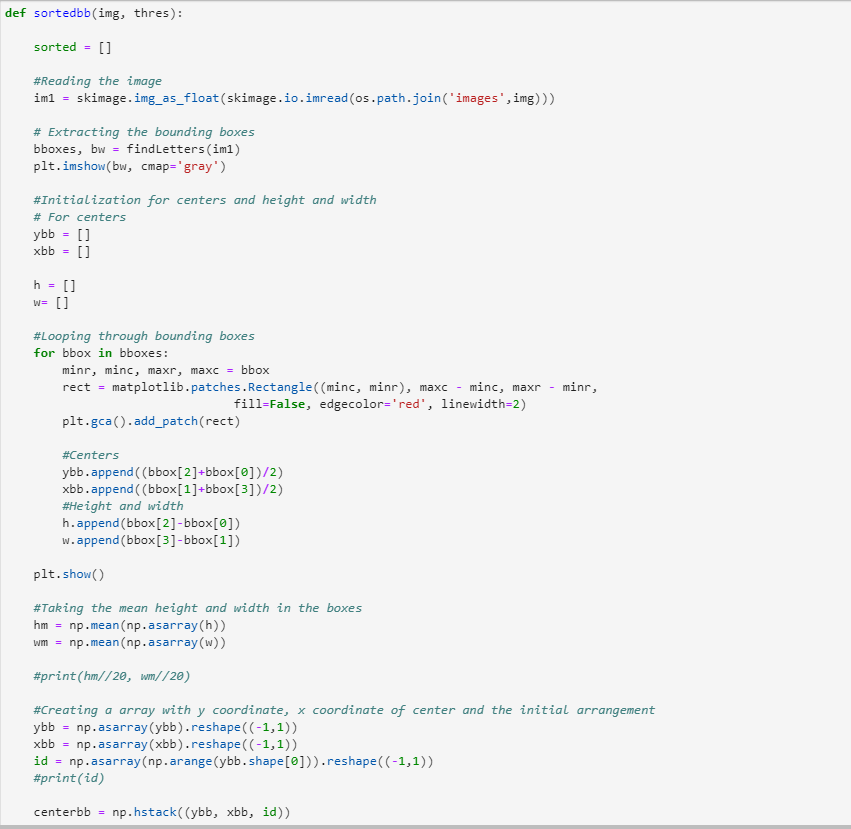

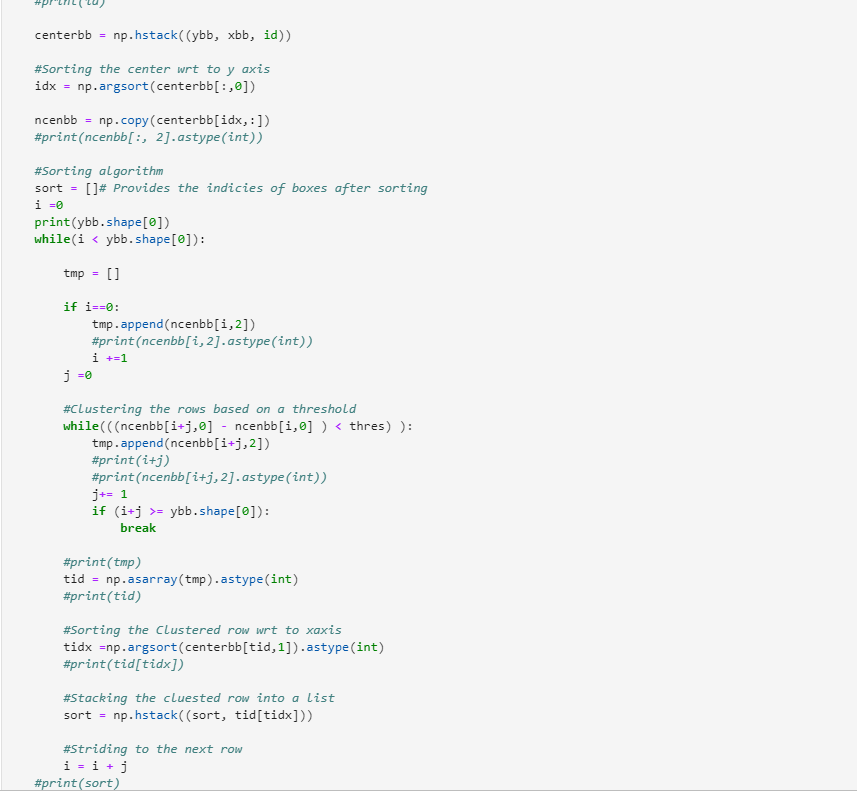

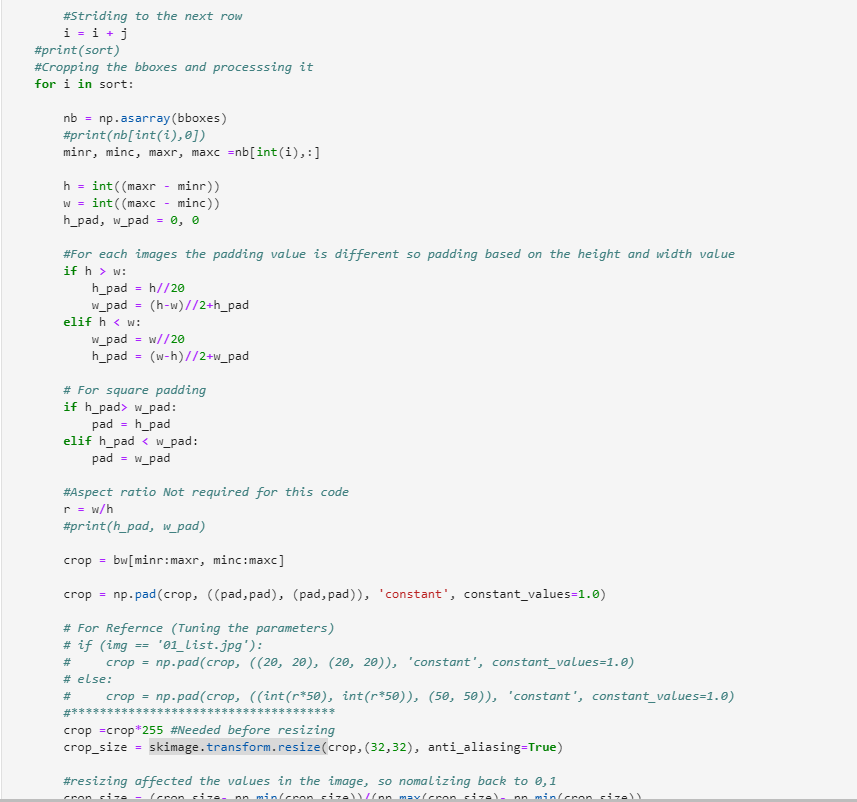

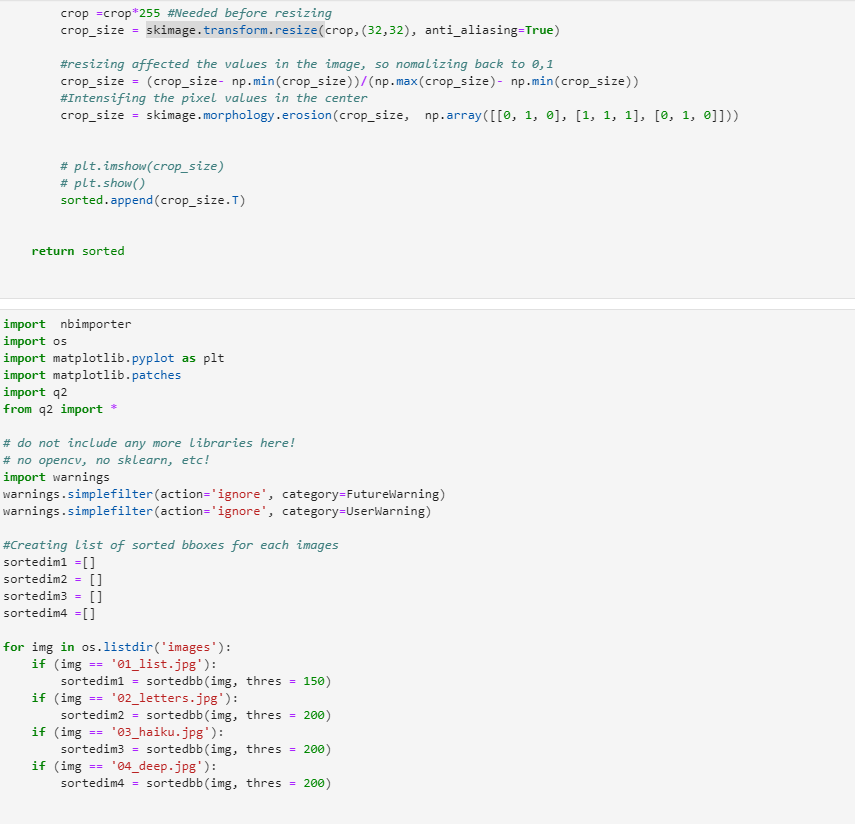

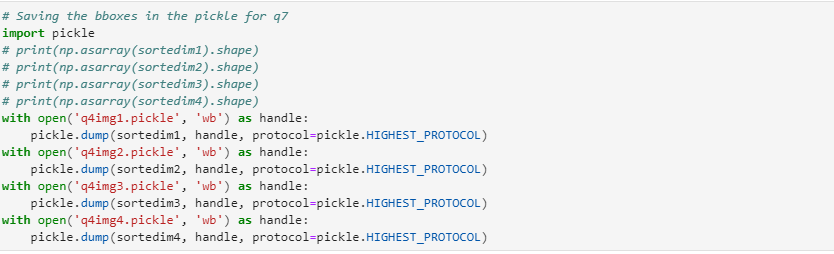

### Q4.4 (13 points Code+WriteUp)

Results from the extracted image and the original answers. From the results we get about 80%. The results are good except for the To Do list. 

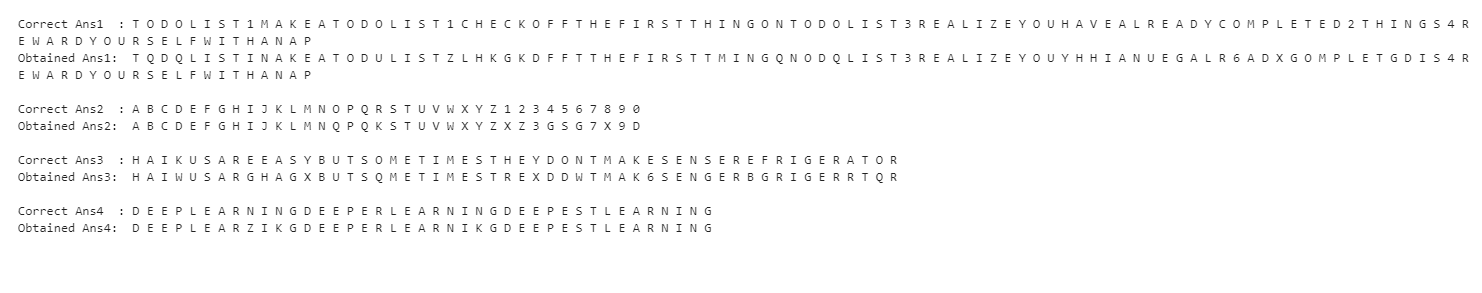

Code:

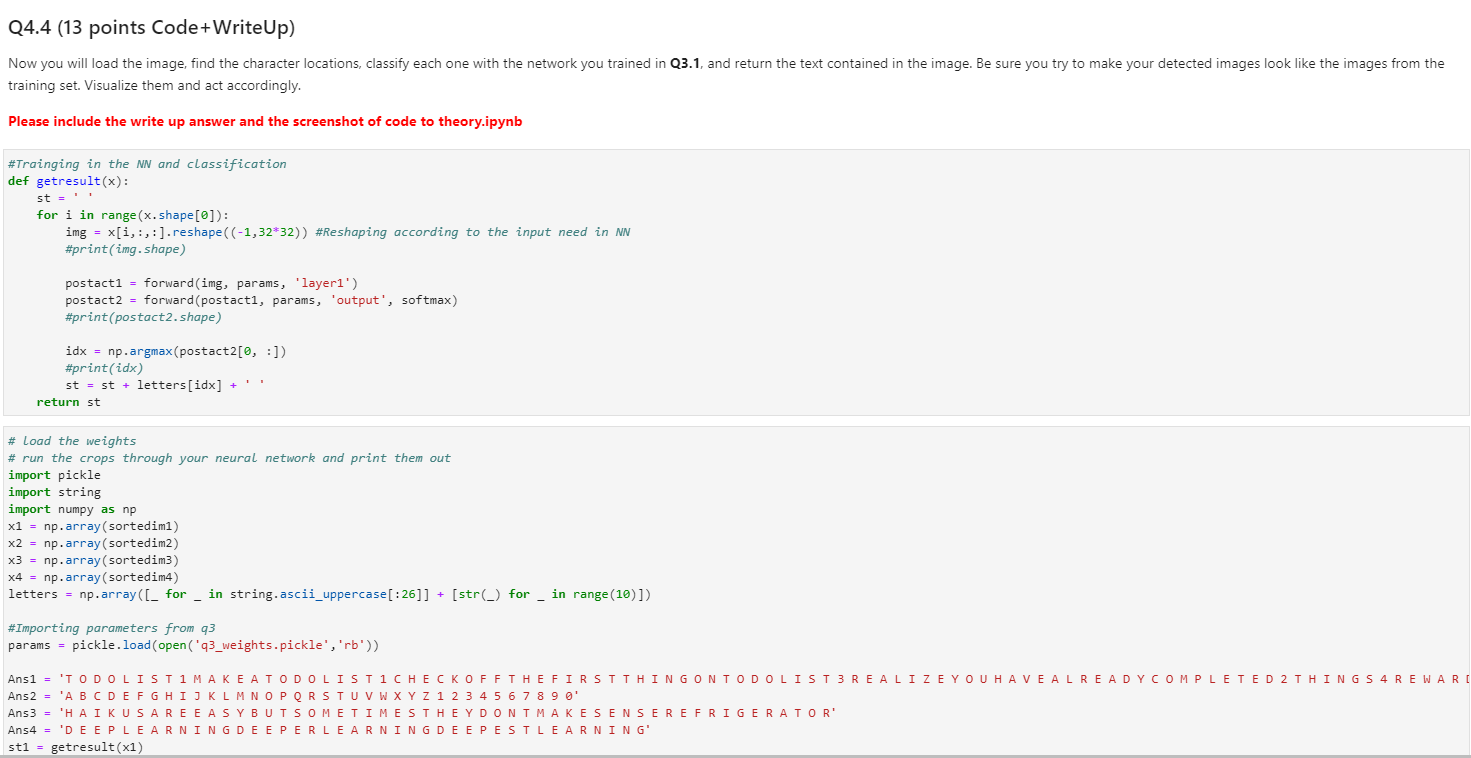

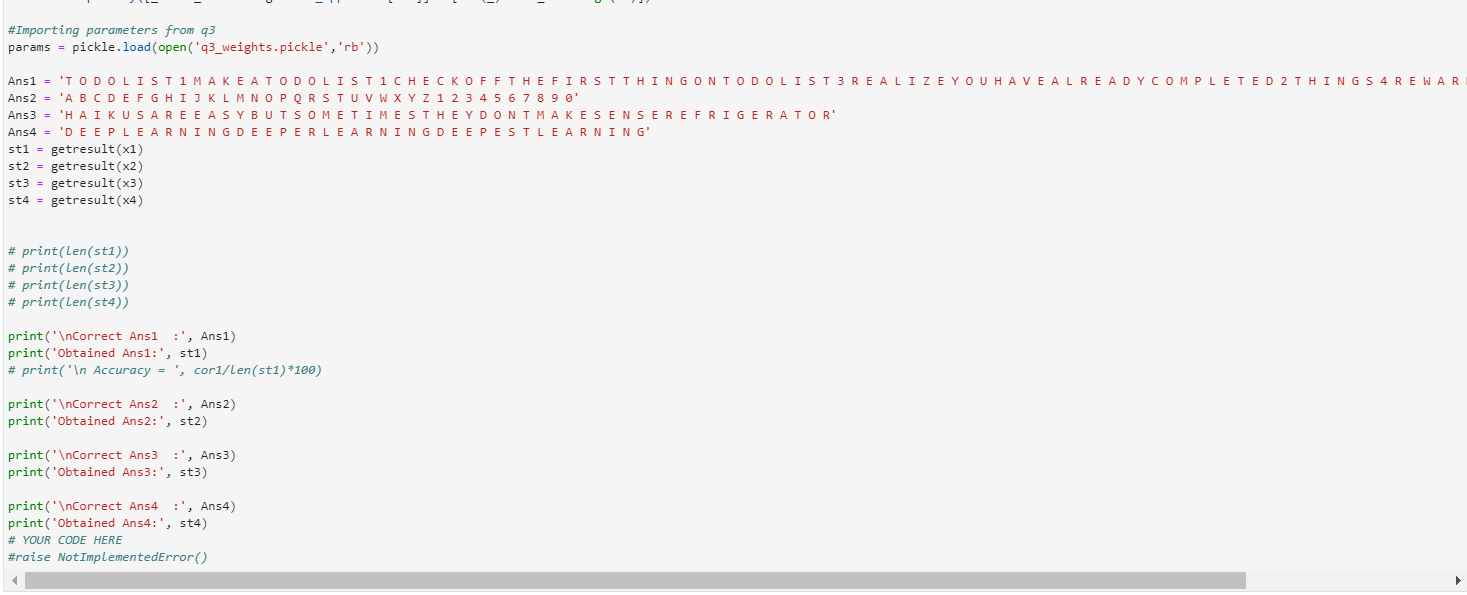

## Q5 Image Compression with Autoencoders [Extra Credit](25 points)

#### Q5.1.1 [Extra Credit](10 points Code)

YOUR ANSWER HERE

### Q5.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

#### Q5.3.2 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q6 Comparing against PCA [Extra Credit](15 Points)

### Q6.1 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.2 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.3 [Extra Credit](4 points Code+WriteUp)

YOUR ANSWER HERE

### Q6.4 [Extra Credit](3 points Code+WriteUp)

YOUR ANSWER HERE

## Q7 PyTorch (40 points)

#### Q7.1.1 (10 points Code+WriteUp)

The final validation accuracy = 0.78

Results:

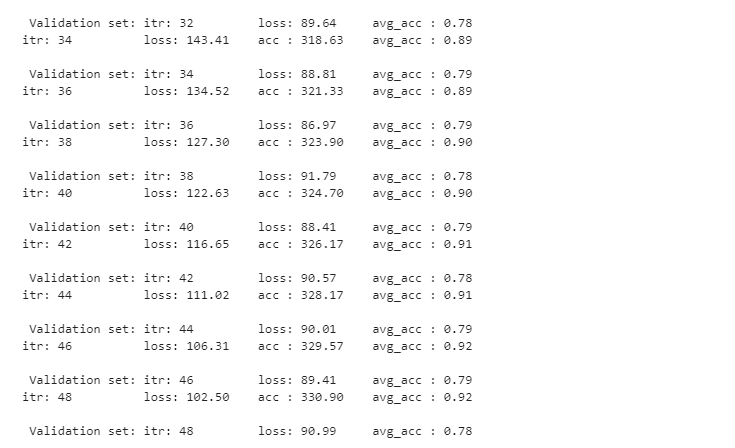

Plots:

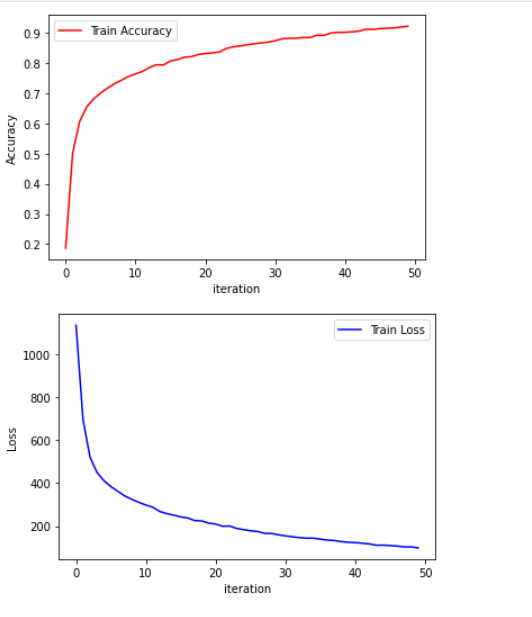

Code:


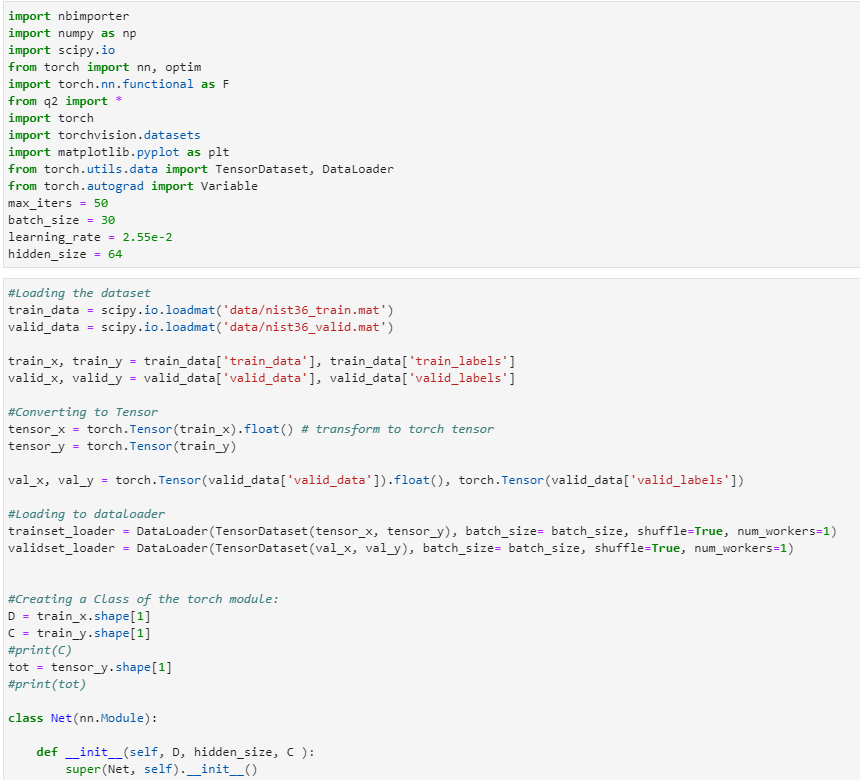

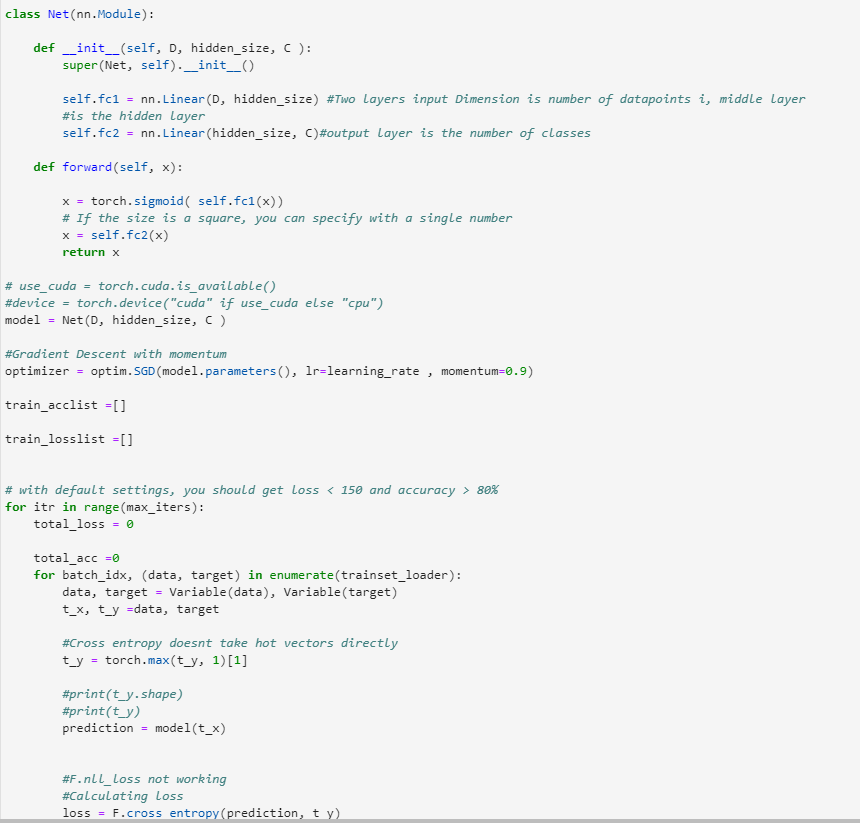

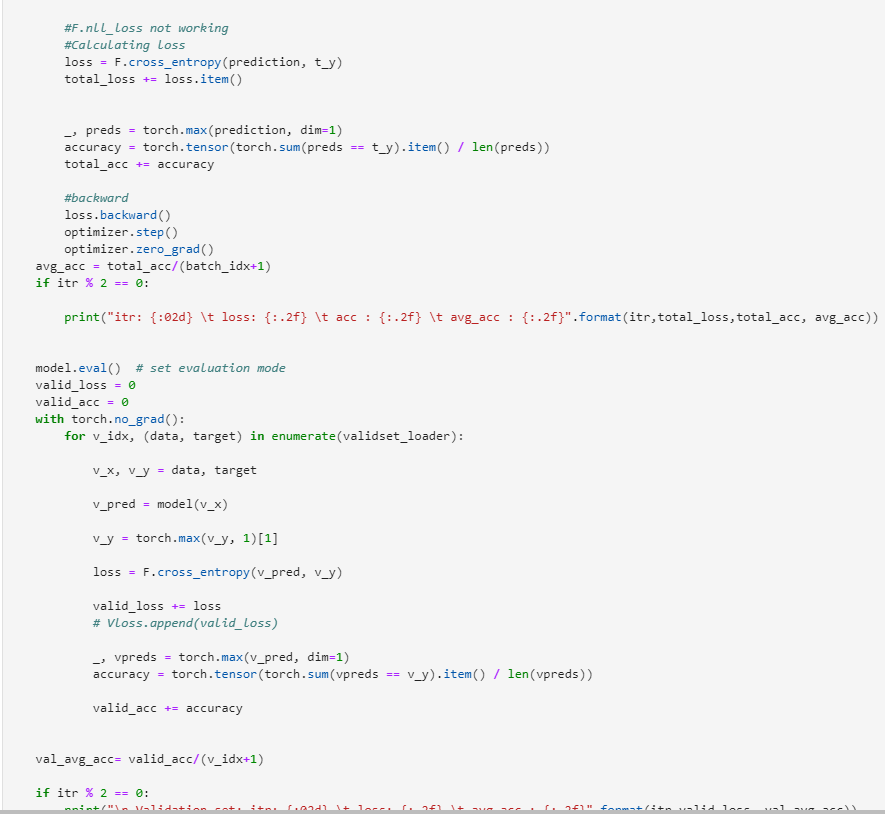

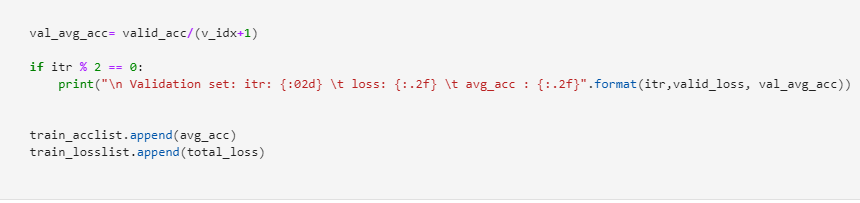

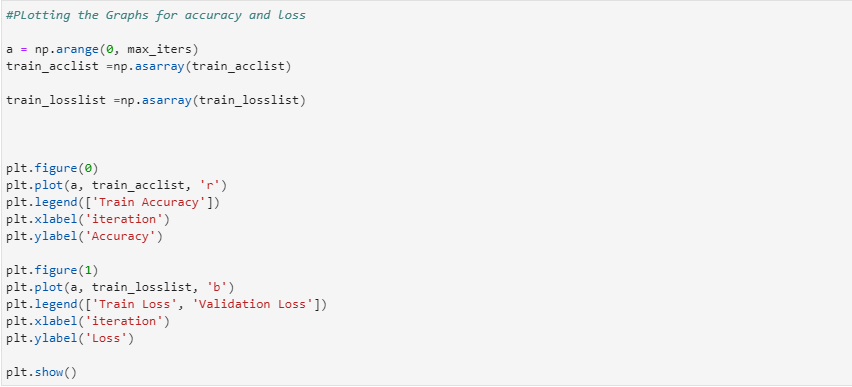

#### Q7.1.2 (3 points Code+WriteUp)

Plots:

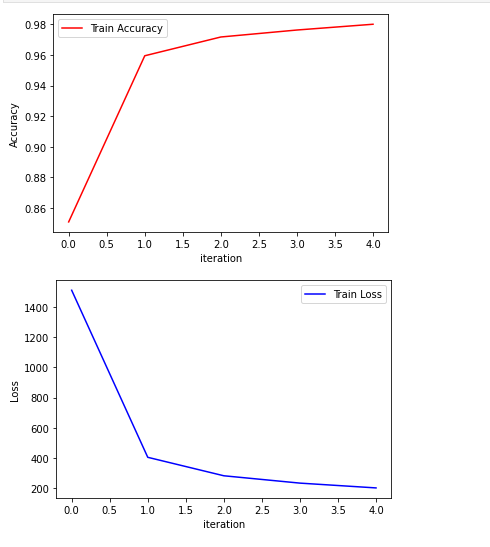



Code:

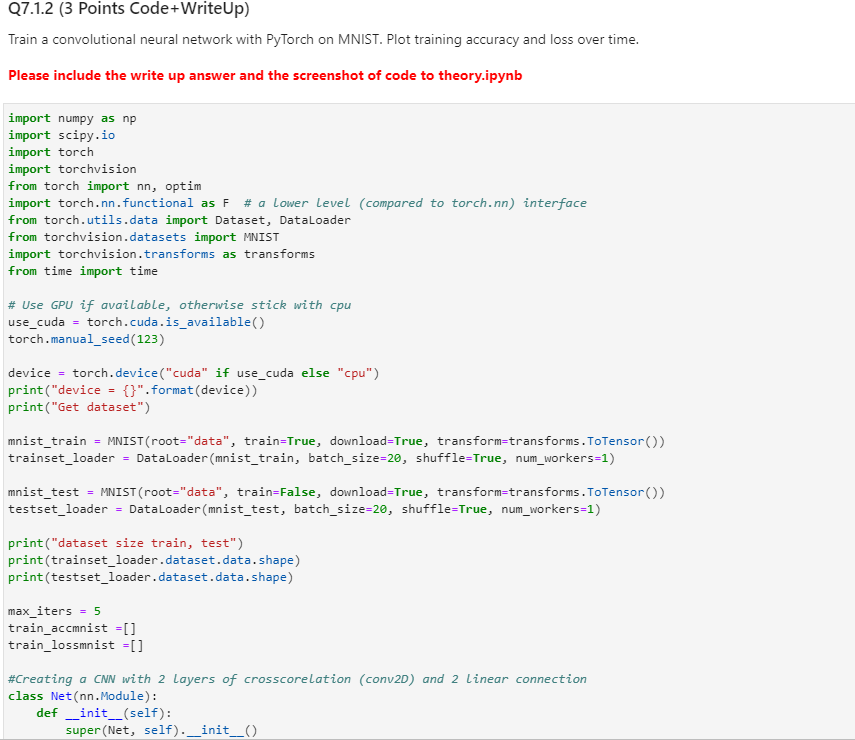

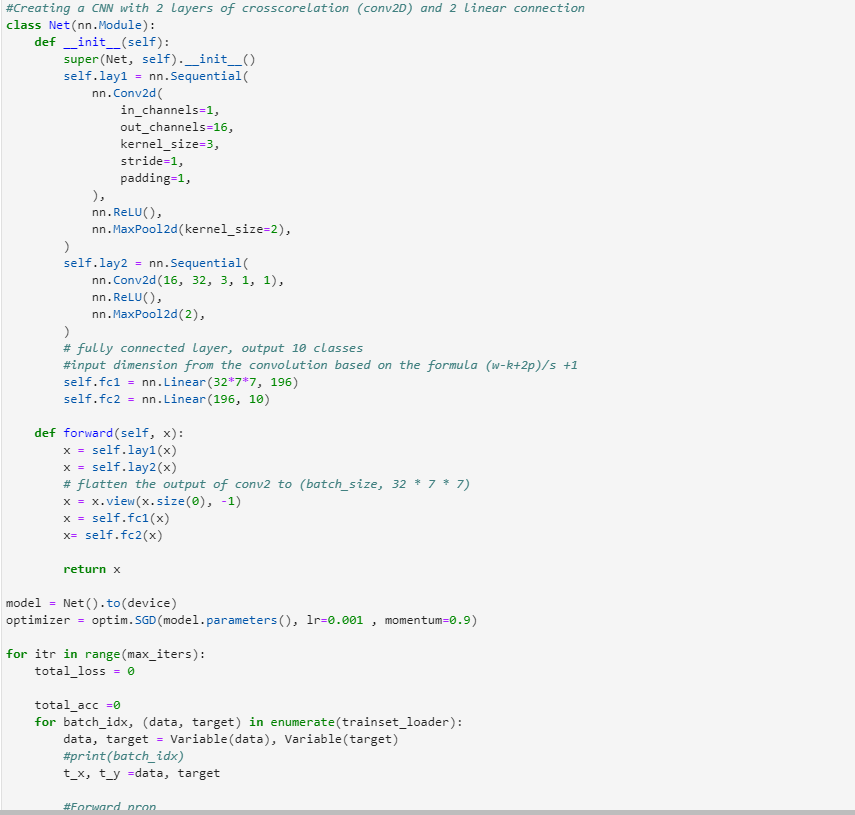

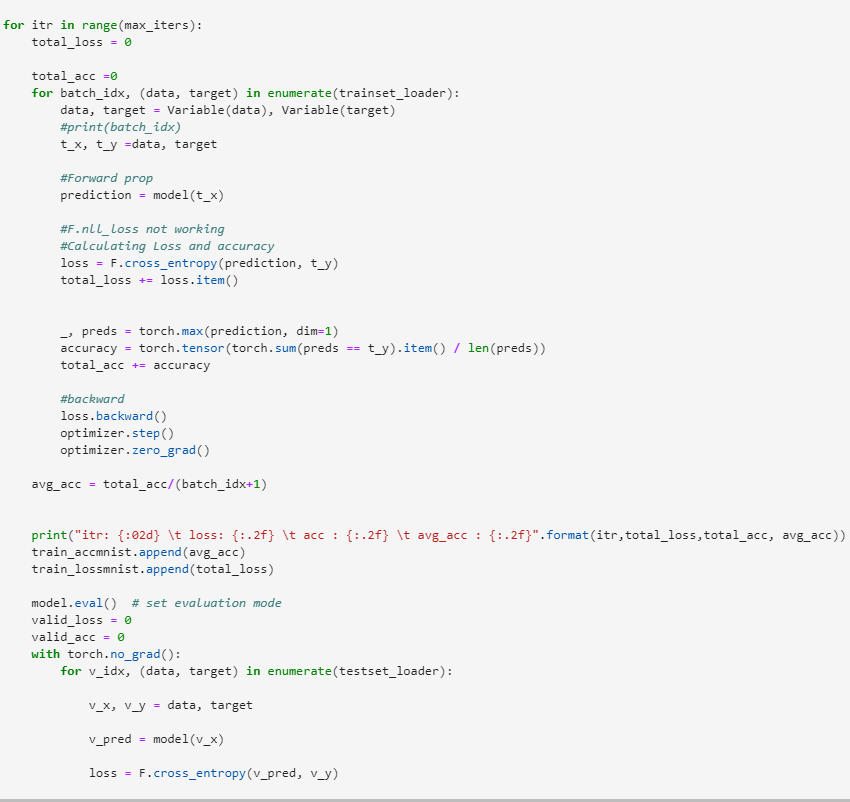

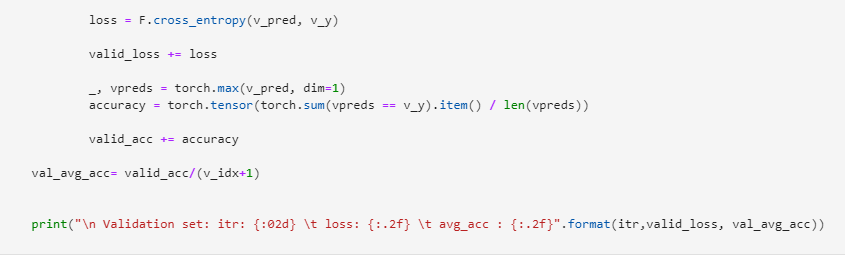

#### Q7.1.3 (2 points Code+WriteUp)

Results:

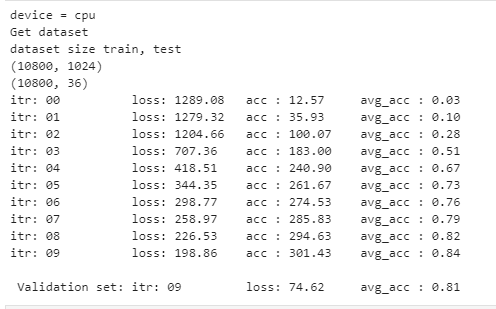

Plots:

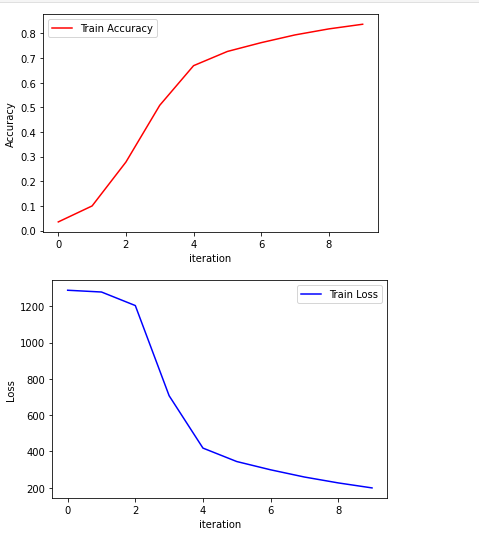

Code: 

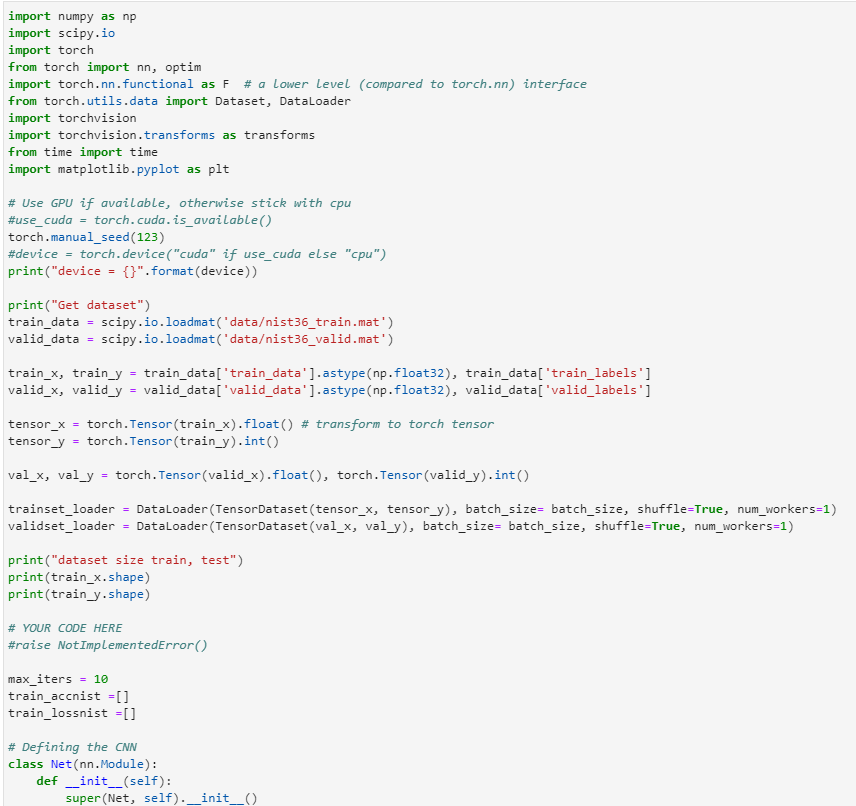

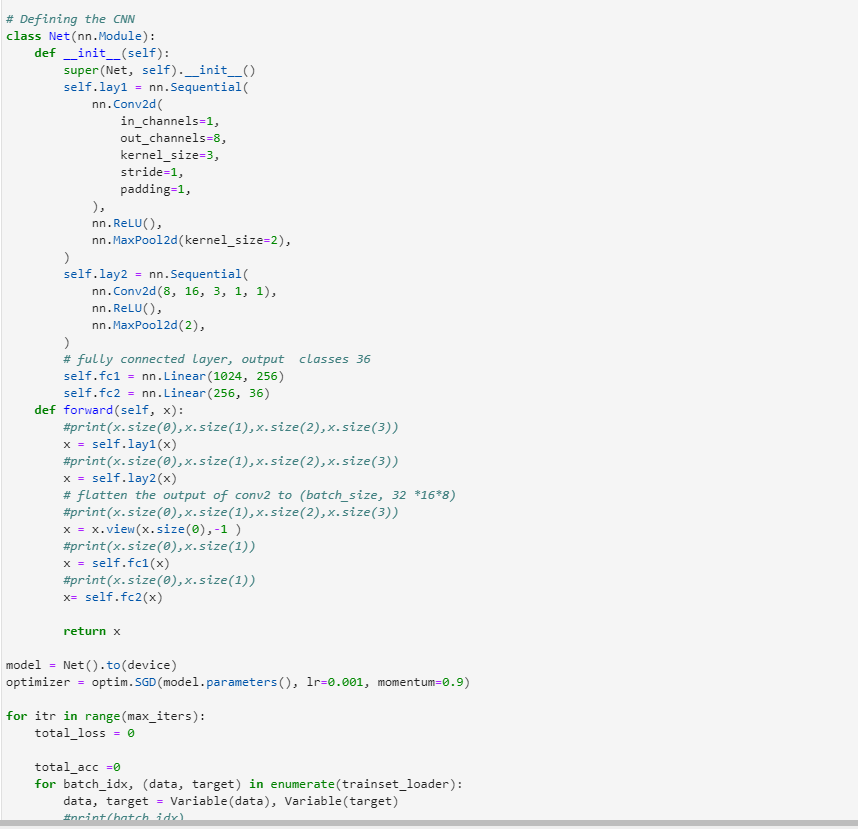

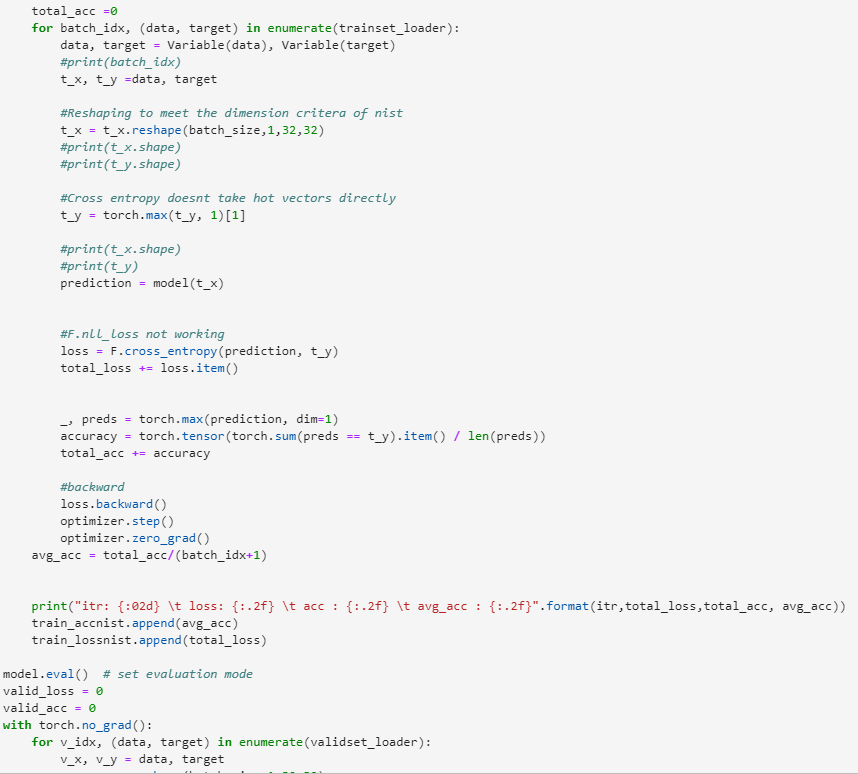

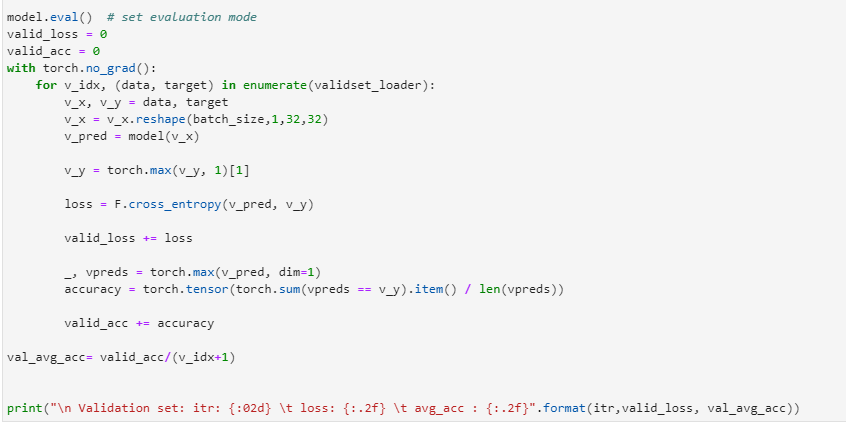

#### Q7.1.4 (15 points Code+WriteUp)

Results: As we can see from the CNN, the results we obtain are much closer to 90-95%

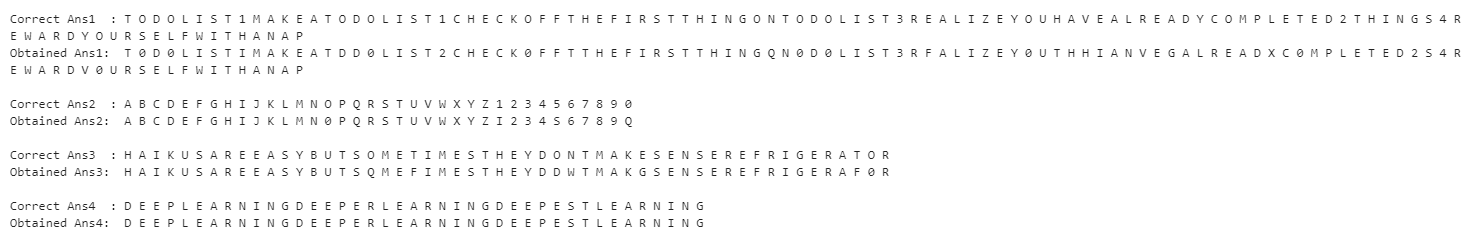

Code For CNN:

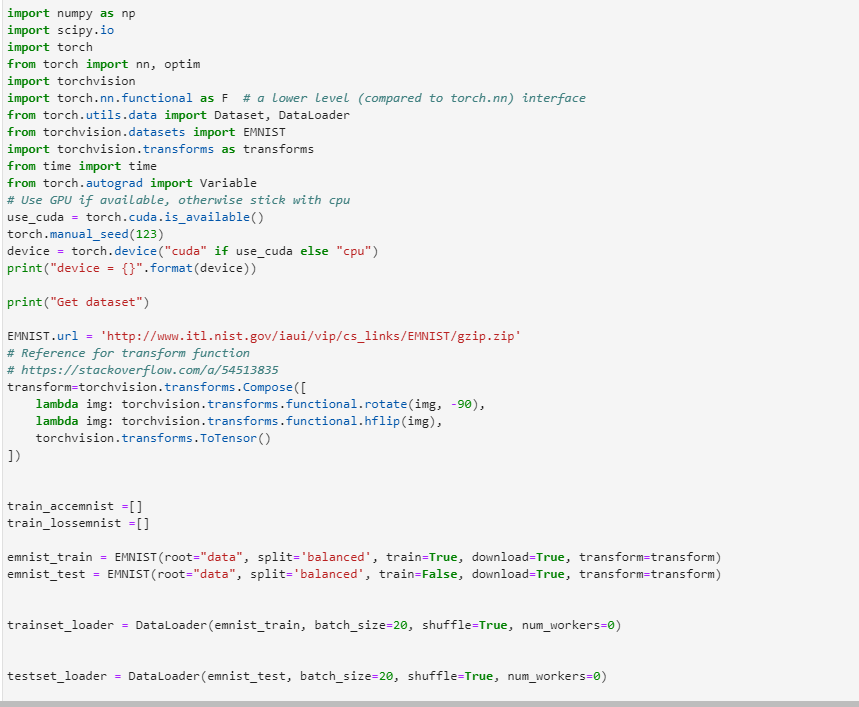

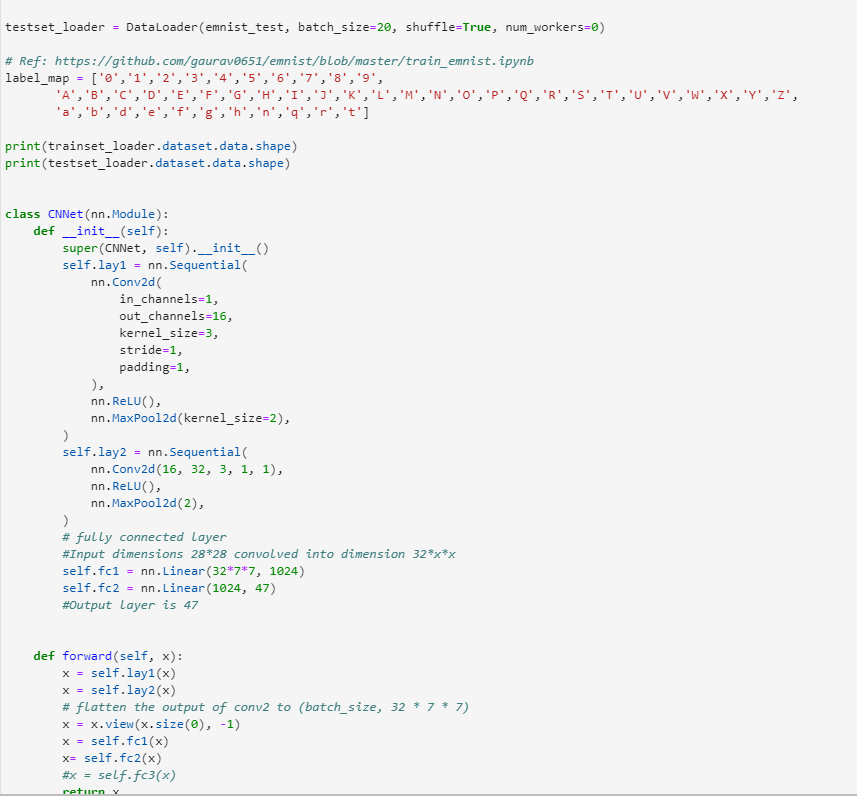

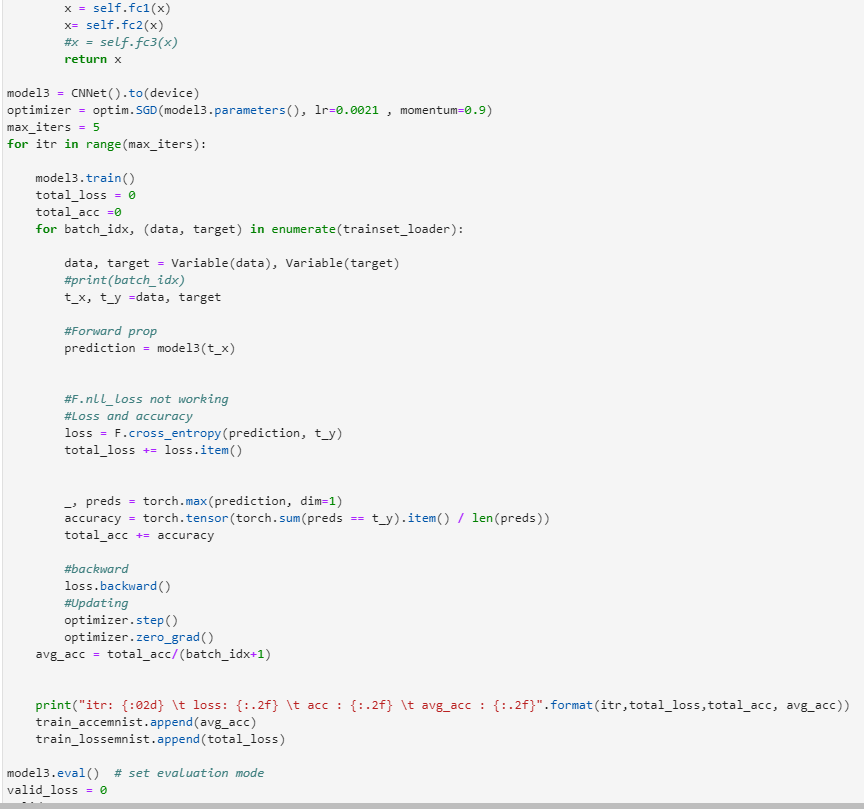

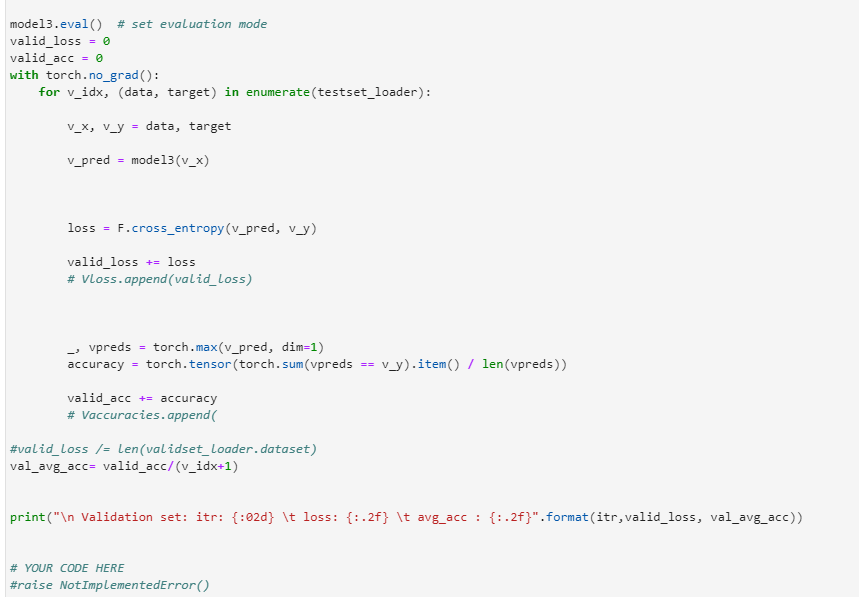

Code for testing on bounding boxes:

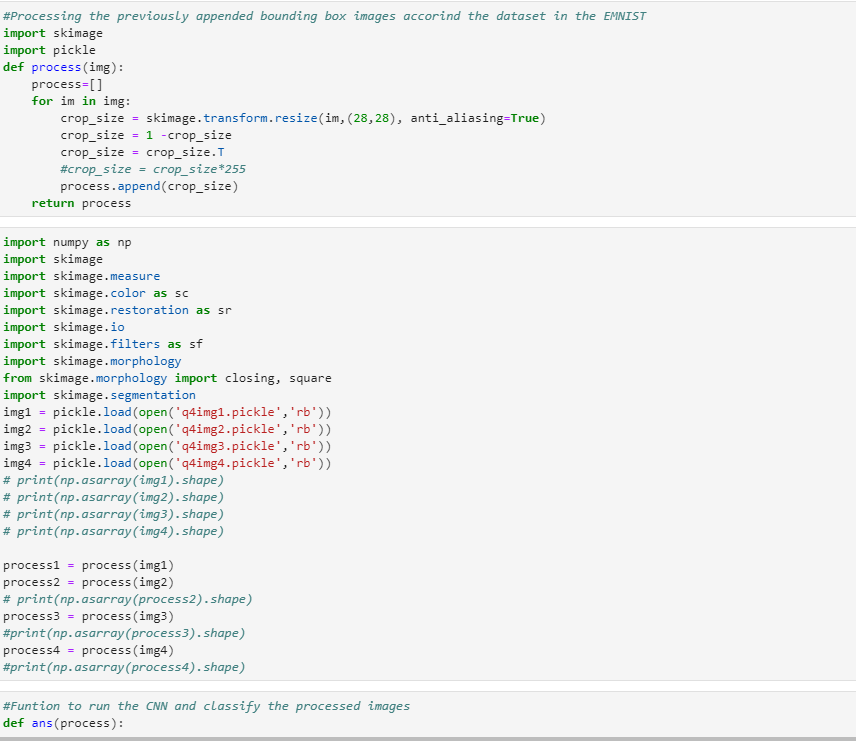

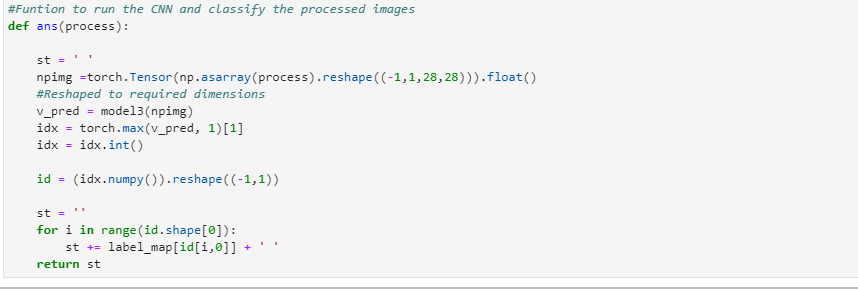

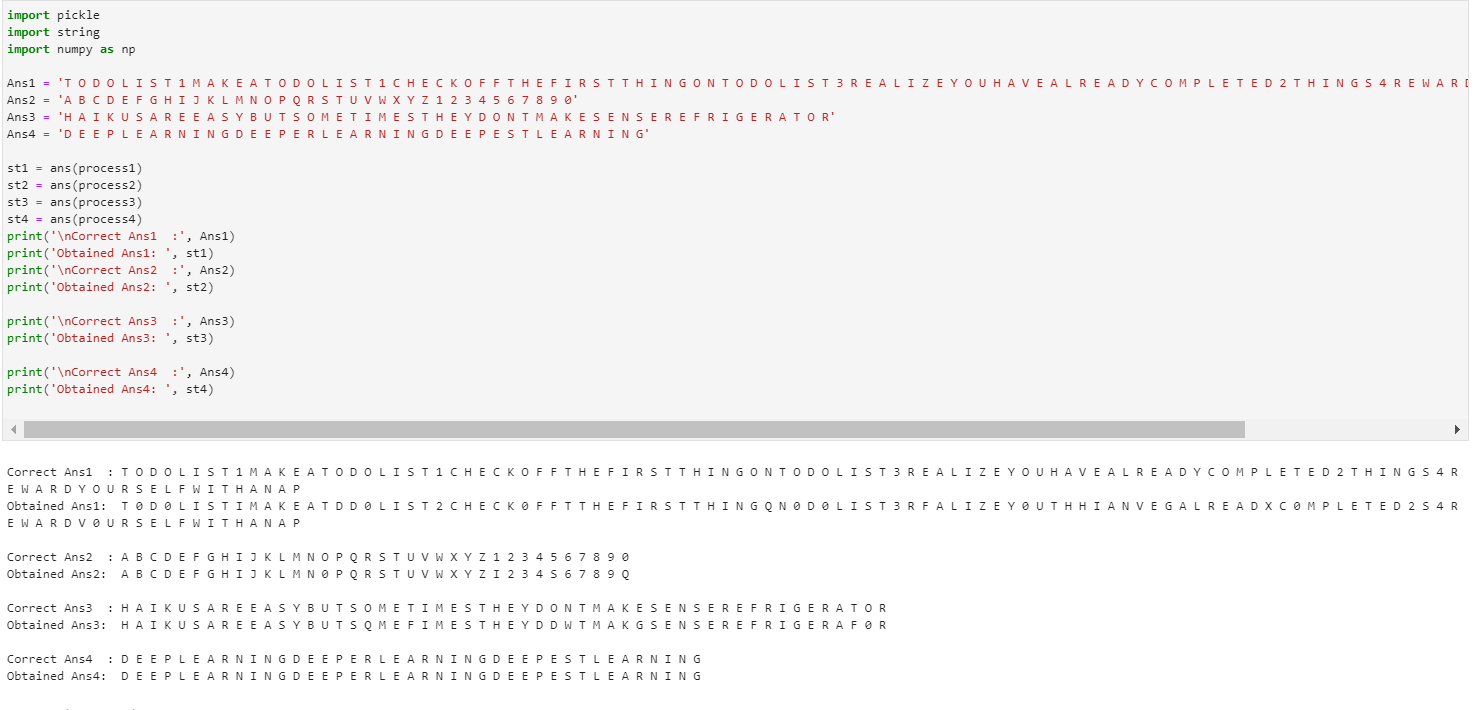

#### Q7.2.1 (10 points WriteUp)

YOUR ANSWER HERE

## Appendix: Neural Network Overview
Deep learning has quickly become one of the most applied machine learning techniques in computer vision. Convolutional neural networks have been applied to many different computer vision problems such as image classification, recognition, and segmentation with great success. In this assignment, you will first implement a fully connected feed forward neural network for hand written character classification. Then in the second part, you will implement a system to locate characters in an image, which you can then classify with your deep network. The end result will be a system that, given an image of hand written text, will output the text contained in the image.

### Basic Use
Here we will give a brief overview of the math for a single hidden layer feed forward network. For a more detailed look at the math and derivation, please see the class slides.

A fully-connected network $\textbf{f}$, for classification, applies a series of linear and non-linear functions to an input data vector $\textbf{x}$ of size $N\times 1$ to produce an output vector $\textbf{f}(\textbf{x})$ of size $C\times 1$, where each element $i$ of the output vector represents the probability of $\textbf{x}$ belonging to the class $i$. Since the data samples are of dimensionality $N$, this means the input layer has $N$ input units. To compute the value of the output units, we must first compute the values of all the hidden layers. The first hidden layer *pre-activation* $\textbf{a}^{(1)}(\textbf{x})$ is given by

$$\textbf{a}^{(1)}(\textbf{x}) = \textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)}$$

Then the *post-activation* values of the first hidden layer $\textbf{h}^{(1)}(\textbf{x})$ are computed by applying a non-linear activation function $\textbf{g}$ to the *pre-activation* values

$$\textbf{h}^{(1)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(1)}(\textbf{x})) = \textbf{g}(\textbf{W}^{(1)}\textbf{x} + \textbf{b}^{(1)})$$

Subsequent hidden layer ($1 < t \leq T$) pre- and post activations are given by:

$$\textbf{a}^{(t)}(\textbf{x}) = \textbf{W}^{(t)}\textbf{h}^{(t-1)} + \textbf{b}^{(t)}$$

$$\textbf{h}^{(t)}(\textbf{x}) = \textbf{g}(\textbf{a}^{(t)}(\textbf{x}))$$

The output layer *pre-activations* $\textbf{a}^{(T)}(\textbf{x})$ are computed in a similar way

$$\textbf{a}^{(T)}(\textbf{x}) = \textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)}$$

and finally the \emph{post-activation} values of the output layer are computed with
$$\textbf{f}(\textbf{x}) = \textbf{o}(\textbf{a}^{(T)}(\textbf{x})) = \textbf{o}(\textbf{W}^{(T)}\textbf{h}^{(T-1)}(\textbf{x}) + \textbf{b}^{(T)})$$

where $\textbf{o}$ is the output activation function. Please note the difference between $\textbf{g}$ and $\textbf{o}$! 
For this assignment, we will be using the sigmoid activation function for the hidden layer, so:
$$\textbf{g}(y) = \frac{1}{1+\exp(-y)}$$
where when $\textbf{g}$ is applied to a vector, it is applied element wise across the vector.

Since we are using this deep network for classification, a common output activation function to use is the softmax function. This will allow us to turn the real value, possibly negative values of $\textbf{a}^{(T)}(\textbf{x})$ into a set of probabilities (vector of positive numbers that sum to 1). Letting $\textbf{x}_i$ denote the $i^{th}$ element of the vector $\textbf{x}$, the softmax function is defined as:
$$\textbf{o}_i(\textbf{y}) = \frac{\exp(\textbf{y}_i)}{\sum_j \exp(\textbf{y}_j)}$$

![](figures/letter_montage.jpg)
<center>Samples from NIST Special 19  dataset</center>


Gradient descent is an iterative optimisation algorithm, used to find the local optima. To find the local minima, we start at a point on the function and move in the direction of negative gradient (steepest descent) till some stopping criteria is met.

### Backprop
The update equation for a general weight $W^{(t)}_{ij}$ and bias $b^{(t)}_i$ is
$$
W^{(t)}_{ij} = W^{(t)}_{ij} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial W^{(t)}_{ij}}(\textbf{x})\hspace{1cm}
b^{(t)}_{i} = b^{(t)}_{i} - \alpha*\frac{\partial L_{\textbf{f}}}{\partial b^{(t)}_{i}}(\textbf{x})
$$
$\alpha$ is the learning rate. Please refer to the back-propagation slides for more details on how to derive the gradients. Note that here we are using softmax loss (which is different from the least square loss in the slides).

## References

[1]  Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feedforward neural networks. 2010. http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf.

[2]  P. J. Grother. Nist special database 19 – handprinted forms and characters database. https://www.nist.gov/srd/nist-special-database-19, 1995.